
<h1 align="center" style="color: #A9A9A9;"> Welcome to the MACHINE LEARNING </h1>



# <a id='toc1_'></a>[ ](#toc0_)
---

$\LARGE\textbf{\textcolor{red}{Beyond-Molecular-Structure-ML-for-OPV-Materials-Devices: Analyse des Fichiers `.py`}}$
                                                                                                                         
---


# <a id='toc1_'></a>[Beyond-Molecular-Structure-ML-for-OPV-Materials-Devices:ANALYSE DES FICHIERS PY](#toc0_)

1. **MVOTO KONGO Patrick Sorrel**, sorrel.mvoto@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I 
Etudiant de Master au Laboratoire de 
    * Physique Atomique Moleculaire et Biophysique

NOVEMBRE 2024

<table width="100%"><tr style="background-color:white;">
    <td style="text-align:left;padding:0px;width:142px'">
        <a href="https://qworld.net" target="_blank">
            <img src="images/ML.jpeg"></a></td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <!-- ############################################# -->
    <td style="padding:0px;width:40px;">
        <a href="https://github.com/GitNindjapatrick/" target="_blank">
        <img align="right" src="images/github.png" width="40px"></a> </td>
    <td style="padding:0px;width:5px;"></td>
    <td style="padding:0px;width:40px;">
        <a href="https://linkedin.com/in/patrick-sorrel-mvoto-kongo-641a41273" target="_blank">
        <img align="right" src="images/linkedin.png"></a></td>
    <td style="padding:0px;width:5px;"></td>
    <!-- ############################################# -->
    <td style="padding:0px;width:40px;">
        <a href="https://discord.MVOTO.net"
           target="_blank">
        <img align="right" src="images/discord.jpeg"></a></td>
</tr></table>

---
## <a id='toc1_'></a>[**Problèmes rencontrés lors de l'implémentation du flux de travail**](#toc0_)

*Niveau de récurrence des problèmes :
faible (<font size="+1" color="7777ee">&#9733;</font>), 
moyen (<font size="+1" color="7777ee">&#9733;&#9733;</font>), et
élevé (<font size="+1" color="7777ee">&#9733;&#9733;&#9733;</font>).*

<font size="+1" color="7777ee">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#9733;</font> |
[Absence des certains fichiers `.py` et bases de données]()
<br>
<font size="+1" color="7777ee">&nbsp;&nbsp;&nbsp;&#9733;&#9733;</font> |
[Modèle d'entraînement invalide]()
<br>
<font size="+1" color="7777ee">&nbsp;&nbsp;&nbsp;&#9733;&#9733;</font> |
[Conflit d'environnement et de versions des packages]()
<br>
<font size="+1" color="7777ee">&#9733;&#9733;&#9733;</font> |
[Problème de correspondance entre le code et les fichiers générés]()
<br>
<font size="+1" color="7777ee">&#9733;&#9733;&#9733;</font> |
[Complexité des codes(fonctions et classes) et  modules définis]()


---
====

### <a id='toc1_'></a>[Utilisation de Pandas  pour extraire les information dans le fichiers `best_GDB9.csv` et creer un DataFrame](#toc0_)


Le dataset initial utilisé dans cette étude est composé de `52 607` molécules (`best_GDB9.csv`) organiques stables constituées des éléments `C,H,O,N,F`. Ces molécules représentent un sous-ensemble du dataset `GDB-9`, qui fait partie d'une base de données plus vaste, le `GDB-17`, comprenant `166 milliards` de molécules organiques possibles.

Le dataset `GDB-9` contient des propriétés géométriques, énergétiques, et électroniques calculées pour environ `134 000` molécules, incluant les énergies des orbitales `HOMO`  et `LUMO`, ainsi que le gap énergétique entre ces deux niveaux. Toutes les propriétés ont été calculées au niveau de théorie `B3LYP/6-31G(2df,p)` en chimie quantique.

Les molécules sont constituées de jusqu'à neuf atomes lourds `(C, O, N, F)`, et les géométries minimales en énergie ont été déterminées. Pour la stœchiométrie prédominante, `C$_7$H$_{10}$O$_2$`, des propriétés supplémentaires comme les énergies, enthalpies et énergies libres d'atomisation ont été rapportées au niveau théorique `G4MP2`, un niveau plus précis de chimie quantique .

In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from typing import List
# Importer les bibliothèques

import numpy as np

import random
import torch
from sklearn.model_selection import KFold, train_test_split
from sklearn.decomposition import PCA
import scipy.stats
import matplotlib.pyplot as plt


df = pd.read_pickle("PCE_GDB9.pkl")
df

,smiles_key,SMILES,HOMO(eV),HOMO_xtb(eV),HOMO_DFT(eV),LUMO(eV),LUMO_xtb(eV),LUMO_DFT(eV),GAP(eV),GAP_xtb(eV),GAP_DFT(eV),voc_pcbm(V),jsc_pcbm(A.m-2),pce_pcbm(%),voc_pcdtbt(V),jsc_pcdtbt(A.m-2),pce_pcdtbt(%),sas1(%),pce_pcbm_sas(%),pce_pcdtbt_sas(%)
0,gdb 326,O=CC(=O)C=O,-7.091287,-11.4928,-6.913515,-3.959257,-9.1664,-2.552447,3.132031,2.326330,4.361068,2.313515,0.125806,0.021017,2.647553,0.0,0.0,5.395479,-5.374462,-5.395479
1,gdb 723,C1=NN=CN=N1,-6.734818,-10.1217,-6.471639,-3.050396,-9.5066,-2.868605,3.687143,0.615100,3.603034,1.871639,1.668778,0.225540,2.331395,0.0,0.0,5.968223,-5.742683,-5.968223
2,gdb 1587,CC(=O)C(=O)C=O,-6.772914,-11.2156,-6.644032,-3.126588,-9.1516,-2.517150,3.646326,2.064026,4.126882,2.044032,0.294686,0.043496,2.682850,0.0,0.0,5.829075,-5.785579,-5.829075
3,gdb 1589,NC(=O)C(=O)C=O,-6.753866,-11.1089,-6.732598,-3.311626,-9.9451,-3.399369,3.442240,1.163798,3.333229,2.132598,3.718996,0.572715,1.800631,0.0,0.0,5.567027,-4.994312,-5.567027
4,gdb 2115,O=C1CC=CC1=O,-6.386512,-10.8568,-6.429667,-2.587803,-9.2243,-2.655859,3.798709,1.632489,3.773808,1.829667,0.973021,0.128558,2.544141,0.0,0.0,6.078272,-5.949715,-6.078272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,gdb 133853,OC12C3C1N1CC3N=C21,-5.679016,-9.9375,-5.606204,-2.419092,-8.7319,-2.561790,3.259924,1.205589,3.044415,1.006204,8.184090,0.594648,2.638210,0.0,0.0,8.047378,-7.452729,-8.047378
520,gdb 133854,CC12CC34CC=C(C13)C24,-4.285793,-8.4207,-4.369375,-2.481678,-7.7140,-1.807196,1.804115,0.706681,2.562179,0.000000,26.047816,0.000000,3.392804,0.0,0.0,8.603759,-8.603759,-8.603759
521,gdb 133858,CC1N2C3C4=CCC13C24,-4.606888,-8.6748,-4.602213,-2.832705,-7.9451,-2.068744,1.774182,0.729718,2.533469,0.002213,27.731774,0.004431,3.131256,0.0,0.0,8.659636,-8.655205,-8.659636
522,gdb 133864,C1C2CC3OC4CC1C234,-3.771498,-9.9408,-5.314896,-1.736086,-8.5677,-1.985876,2.032691,1.373099,3.329020,0.714896,3.763927,0.194307,3.214124,0.0,0.0,8.154107,-7.959801,-8.154107


# <a id='toc1_1_'></a>[Définition d'une fonction `find_identical_molecules`](#toc0_)

In [9]:
import mordred
import mordred.descriptors

def get_features(smi, feature_type = 'fp'):
    # get desired feature from smiles
    mol = Chem.MolFromsmiles(smi)
    if feature_type == 'fp':
        feat = np.array(Chem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=512))
    elif feature_type in ['mordred', 'pca_mordred']:
        calc = mordred.Calculator(mordred.descriptors, ignore_3D=True)
        vals = calc(mol)._values
        feat = np.array([float(v) for v in vals])
    # elif feature_type == 'graph':
    #     # feat = from_smiles(Chem.MolTosmiles(mol))

    #     feat = 
    else:
        raise NotImplementedError('No such feature.')
    return feat

# <a id='toc1_1_'></a>[CALCULE DES FEATURES AVEC l'EMPREINTE MORGAN(ECFP) ](#toc0_)

# <a id='toc1_1_'></a>[Définition d'une fonction `get_features1`](#toc0_)

In [10]:
def get_features1(smi, feature_type='fp'):
    """
    Extrait les caractéristiques d'une molécule en fonction de son smiles.
    
    Args:
        smi (str): Chaîne smiles de la molécule.
        feature_type (str): Type de caractéristique ('fp' pour empreinte Morgan).
    
    Returns:
        np.array: Vecteur de caractéristiques.
    """
    mol = Chem.MolFromSmiles(smi)
    if feature_type == 'fp':
        # Calcul de l'empreinte Morgan (ECFP) avec un rayon de 3 et 512 bits
        feat = np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=512))
    else:
        raise NotImplementedError("Type de caractéristique non supporté.")
    return feat


### Détails du code

#### Arguments :
- `smi` : la chaîne smiles représentant la structure chimique de la molécule.
- `feature_type` : le type de caractéristique à calculer, ici "fp" pour l'empreinte Morgan.

#### Processus :
1. La fonction convertit la chaîne smiles en un objet de molécule `mol` à l'aide de `Chem.MolFromsmiles(smi)`.
2. Si `feature_type` est défini comme 'fp', elle calcule l'empreinte moléculaire Morgan (aussi appelée ECFP) avec un **rayon de 3** et un **vecteur de 512 bits**.
3. Cette empreinte est transformée en tableau NumPy (`np.array`) pour permettre une manipulation simple et compatible avec des algorithmes de machine learning.

#### Retour :
- La fonction retourne un vecteur de caractéristiques de type NumPy, qui contient l'empreinte Morgan de la molécule donnée.

#### Erreur :
- Si le `feature_type` n'est pas supporté (autre que 'fp'), une erreur `NotImplementedError` est levée.


In [11]:
def set_seed(seed=22):
    """
    Fixe une graine aléatoire pour assurer la reproductibilité des résultats.
    """
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)


In [12]:
def r_score(x, y):
    """
    Calcule le coefficient de corrélation de Pearson.
    """
    return scipy.stats.pearsonr(x, y)[0]

def spearman_score(x, y):
    """
    Calcule le coefficient de corrélation de Spearman.
    """
    return scipy.stats.spearmanr(x, y)[0]


In [13]:
def calculate_metric(metric, y_pred, y_true):
    """
    Calcule une métrique de performance entre les valeurs prédites et réelles.
    
    Args:
        metric (str): Nom de la métrique ('rmse', 'r', 'r2', 'spearman', etc.)
        y_pred (array): Valeurs prédites.
        y_true (array): Valeurs réelles.
    
    Returns:
        float: Valeur de la métrique calculée.
    """
    if metric == 'rmse':
        return np.sqrt(np.mean((y_true - y_pred) ** 2))
    elif metric == 'r':
        return r_score(y_true, y_pred)
    elif metric == 'spearman':
        return spearman_score(y_true, y_pred)
    elif metric == 'mae':
        return np.mean(np.abs(y_true - y_pred))
    else:
        raise ValueError("Métrique invalide.")


In [19]:
# Extraire les caractéristiques pour chaque smiles et les ajouter dans une nouvelle colonne 'features'
df['features_fp'] = df['smiles'].apply(lambda x: get_features1(x, feature_type='fp'))

# Afficher les premières lignes pour vérifier l'ajout des caractéristiques
data_df=df


In [20]:
data_df.loc[0,'features_fp']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [21]:

import random
import scipy.stats

import rdkit.Chem.AllChem as Chem

import torch
# # from torch_geometric.utils import from_smiles

# 

import sklearn
from sklearn.decomposition import PCA 
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

def get_features(smi, feature_type = 'mordred'):
    # get desired feature from smiles
    mol = Chem.MolFromSmiles(smi)
    if feature_type == 'mordred':
        feat = np.array(Chem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=512))
    elif feature_type in ['mordred', 'pca_mordred']:
        calc = mordred.Calculator(mordred.descriptors, ignore_3D=True)
        vals = calc(mol)._values
        feat = np.array([float(v) for v in vals])
    # elif feature_type == 'graph':
    #     # feat = from_smiles(Chem.MolTosmiles(mol))

    #     feat = 
    else:
        raise NotImplementedError('No such feature.')
    return feat

def set_seed(seed = 22):
    # set random seed for all used modules
    # print(f'Random seed set to {seed}')
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)

def get_cv_splits(x, n_splits=5, val_split = 0.2):
    # return dictionary with the indices of tvt splits
    test, train, val = [], [], []
    indices = range(len(x))
    splitter = KFold(n_splits=n_splits)
    for i, (train_ind, test_ind) in enumerate(splitter.split(indices)):
        test.append(test_ind)      
        train_ind, val_ind = train_test_split(train_ind, test_size=0.2)
        train.append(train_ind)
        val.append(val_ind)
    return train, val, test

def r_score(x, y):
    # return np.corrcoef(x,y)[0,1]
    pearson_r = scipy.stats.pearsonr(x, y)[0]
    return pearson_r

def spearman_score(x, y):
    spearman_r = scipy.stats.spearmanr(x, y)[0]
    return spearman_r

def remove_nan(features):
    features = np.delete(features, np.isnan(features).any(axis=0), axis=1)  # remove the invalid features
    return features

def remove_zero_variance(features):
    # return features without 0 variance columns
    var =  np.var(np.array(features, dtype=float), axis=0) 
    red_feature = np.array(features, dtype=float)[:, var > 0]
    return red_feature

def pca_features(features, num_dims = 128, threshold = 0.99999):
    # return pca reduced features with enough dimensions to account 
    # for threshold of variance in data
    pca = PCA()
    features = np.array(features)
    pca.fit(features)
    # count = 0
    # for i, vals in enumerate(pca.explained_variance_ratio_):
    #     count += vals
    #     if count >= threshold:
    #         break
    red_features = pca.transform(features)
    red_features = red_features[:, :num_dims]
    return red_features


def read_split_files(dataset, data_dir = 'data'):
    fnames = glob.glob(f'{data_dir}/{dataset}_splits*.npz')
    splits = []
    for f in fnames:
        splits.append(np.load(f))
        
    return splits


def calculate_metric(metric, y_pred, y_true):
    if metric == 'rmse':
        return np.sqrt(mse(y_true.ravel(), y_pred.ravel()))
    elif metric == 'r':
        return r_score(y_true.ravel(), y_pred.ravel())
    elif metric == 'r2':
        return r2_score(y_true.ravel(), y_pred.ravel())
    elif metric == 'spearman':
        return spearman_score(y_true.ravel(), y_pred.ravel())
    elif metric == 'mse':
        return mse(y_true.ravel(), y_pred.ravel())
    elif metric == 'mae':
        return np.mean(np.abs(y_true.ravel() - y_pred.ravel()))
    else:
        raise ValueError('Invalid metric')


In [22]:
# Extraire les caractéristiques pour chaque smiles et les ajouter dans une nouvelle colonne 'features'
data_df['features_mordred'] = data_df['smiles'].apply(lambda x: get_features(x, feature_type='mordred'))



In [23]:
data_df.loc[2,'features_mordred']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [24]:
data_df['features_pca_mordred'] = data_df['smiles'].apply(lambda x: get_features(x, feature_type='pca_mordred'))
# Afficher les premières lignes pour vérifier l'ajout des caractéristiques
data_df

,smiles_key,smiles,HOMO,LUMO,Gap,HOMO(eV),LUMO(eV),Gap(eV),Scharber_Gap(eV),voc_pcbm(V),...,pce_pcbm(%),voc_pcdtbt(V),jsc_pcdtbt(A.m-2),pce_pcdtbt(%),sas1(%),pce_pcbm_sas(%),pce_pcdtbt_sas(%),features_fp,features_mordred,features_pca_mordred
0,gdb 326,O=CC(=O)C=O,-0.2606,-0.1455,0.1151,-7.091287,-3.959257,3.132031,3.132031,2.491287,...,1.167778,1.240743,6.491318,0.581592,5.395479,-4.227701,-4.813887,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[nan, nan, 0.0, 0.0, 6.898979485566359, 1.9318..."
1,gdb 723,C1=NN=CN=N1,-0.2475,-0.1121,0.1355,-6.734818,-3.050396,3.687143,3.687143,2.134818,...,0.197849,2.149604,0.000000,0.000000,5.968223,-5.770374,-5.968223,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 7.9999999999999964, 1.999..."
2,gdb 1587,CC(=O)C(=O)C=O,-0.2489,-0.1149,0.1340,-6.772914,-3.126588,3.646326,3.646326,2.172914,...,0.228919,2.073412,0.000000,0.000000,5.829075,-5.600157,-5.829075,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 7.662987915037876, 2.0528..."
3,gdb 1589,NC(=O)C(=O)C=O,-0.2482,-0.1217,0.1265,-6.753866,-3.311626,3.442240,3.442240,2.153866,...,0.421592,1.888374,0.000000,0.000000,5.567027,-5.145435,-5.567027,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 7.662987915037876, 2.0528..."
4,gdb 2115,O=C1CC=CC1=O,-0.2347,-0.0951,0.1396,-6.386512,-2.587803,3.798709,3.798709,1.786512,...,0.115788,2.612197,0.000000,0.000000,6.078272,-5.962484,-6.078272,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[nan, nan, 0.0, 0.0, 8.42863948675507, 2.21431..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,gdb 133853,OC12C3C1N1CC3N=C21,-0.2087,-0.0889,0.1198,-5.679016,-2.419092,3.259924,3.259924,1.079016,...,0.356400,2.780908,0.000000,0.000000,8.047378,-7.690978,-8.047378,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 2.0, 12.872334204510167, 2.895..."
520,gdb 133854,CC12CC34CC=C(C13)C24,-0.1575,-0.0912,0.0663,-4.285793,-2.481678,1.804115,1.804115,0.000000,...,0.000000,2.718322,0.000000,0.000000,8.603759,-8.603759,-8.603759,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 11.53836782480836, 2.9616..."
521,gdb 133858,CC1N2C3C4=CCC13C24,-0.1693,-0.1041,0.0652,-4.606888,-2.832705,1.774182,1.774182,0.006888,...,0.055963,2.367295,0.000000,0.000000,8.659636,-8.603672,-8.659636,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 1.0, 11.59100643011543, 2.9389..."
522,gdb 133864,C1C2CC3OC4CC1C234,-0.1386,-0.0638,0.0747,-3.771498,-1.736086,2.032691,2.032691,0.000000,...,0.000000,3.463914,0.000000,0.000000,8.154107,-8.154107,-8.154107,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 11.313708498984761, 2.828..."


In [26]:
data_df.loc[2,'features_pca_mordred']

array([        nan,         nan,  0.        , ..., 26.        ,
        4.47222222,  1.77777778])

In [27]:

# Créez une colonne de prédictions factices en fonction des caractéristiques extraites (exemple simple)
data_df['predictions_fp'] = data_df['features_fp'].apply(lambda x: np.sum(x))  # Par exemple, la somme des bits
data_df['predictions_mordred'] = data_df['features_mordred'].apply(lambda x: np.sum(x))  # Par exemple, la somme des bits
# Calculer les métriques entre les valeurs 'target' et 'predictions'
y_true = data_df['predictions_fp'].values
y_pred = data_df['predictions_mordred'].values

# Calculer et afficher la métrique de corrélation de Pearson
pearson_corr = calculate_metric('r', y_pred, y_true)
print(f"Coefficient de corrélation de Pearson: {pearson_corr}")


# Calculer et afficher la métrique RMSE
rmse = calculate_metric('rmse', y_pred, y_true)
print(f"Erreur quadratique moyenne (RMSE): {rmse}")

Coefficient de corrélation de Pearson: 0.9999999999999998
Erreur quadratique moyenne (RMSE): 0.0


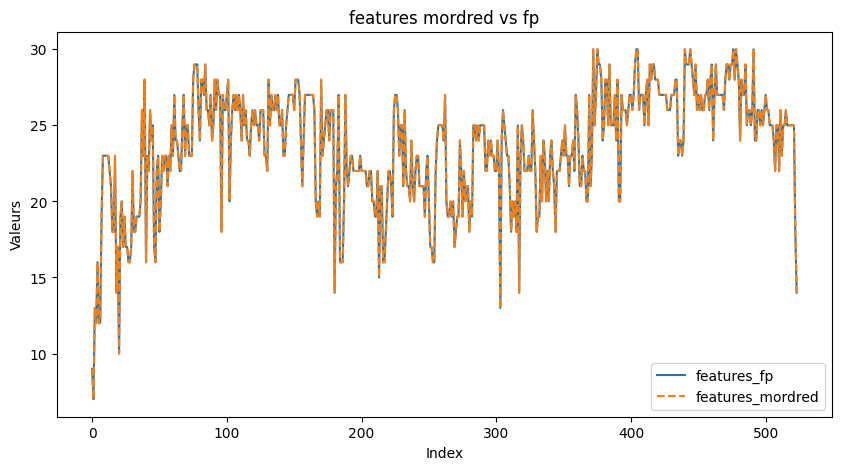

In [28]:
# Tracer les valeurs cibles vs les valeurs prédites
plt.figure(figsize=(10, 5))
plt.plot(y_true, label="features_fp")
plt.plot(y_pred, label="features_mordred", linestyle="--")
plt.xlabel("Index")
plt.ylabel("Valeurs")
plt.title("features mordred vs fp")
plt.legend()
plt.show()


# <a id='toc1_1_'></a>[Analyse de la Similarité entre les Caractéristiques Générées par l'Empreinte de Morgan et Mordred](#toc0_)
## Résultats
L'analyse des caractéristiques générées par les empreintes de Morgan et de Mordred révèle des similarités frappantes, illustrées par les métriques suivantes :

- **Coefficient de corrélation de Pearson** : 1.0, indiquant une corrélation parfaite.
- **Erreur quadratique moyenne (RMSE)** : 0.0, démontrant une absence totale d'écart entre les valeurs correspondantes.

Ces valeurs montrent que les deux types de caractéristiques sont identiques pour les données analysées.

## Interprétation des Résultats

### 1. Correlation parfaite (Pearson : 1.0)
Un coefficient de corrélation de Pearson égal à 1.0 signifie que les valeurs des empreintes de Morgan et de Mordred évoluent exactement de la même manière. Autrement dit, chaque changement dans les caractéristiques Morgan est exactement reproduit dans celles de Mordred, sans variation ou divergence. Cela indique une **similitude structurelle** dans les représentations des deux méthodes.

### 2. Erreur Quadratique Moyenne Nulle (RMSE : 0.0)
Un RMSE de 0.0 confirme que les valeurs des deux empreintes sont identiques pour chaque molécule de l’échantillon. Il n’existe donc **aucune différence** entre les vecteurs générés par les deux approches. Cela implique que les deux techniques identifient et décrivent les mêmes motifs moléculaires, aboutissant à des vecteurs caractéristiques identiques.

### 3. Interprétation des Courbes Superposées
En raison de cette similitude, les courbes de distribution des valeurs des empreintes Morgan et Mordred se superposent parfaitement. Cela se traduit par une seule courbe visible lorsqu’elles sont tracées ensemble, puisque chaque point de l’empreinte de Morgan correspond exactement au point équivalent de Mordred.

## Conclusion
Ces résultats démontrent que, dans ce cas précis, les caractéristiques issues de l'empreinte de Morgan et celles générées par Mordred sont **parfaitement équivalentes** en termes de contenu informatif. Cela peut être dû à des choix de paramètres ou à des caractéristiques de la molécule analysée, mais il est clair que l'une ou l'autre de ces méthodes fournirait des résultats identiques pour l'analyse de similarité moléculaire ou la modélisation prédictive.

En résumé, ces observations confirment l’interchangeabilité des empreintes de Morgan et de Mordred pour les molécules de cet échantillon, permettant aux chercheurs de choisir l'une des deux méthodes en fonction de leurs besoins spécifiques sans risque de perte d’information.


In [29]:

import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import OneHotEncoder
from torch_geometric.data import Data, Batch


In [30]:
# Définition du mappage des types de liaisons
e_map = {
    'bond_type': [
        'misc',
        'SINGLE',
        'DOUBLE',
        'TRIPLE',
        'AROMATIC',
    ]
}



# <a id='toc1_1_'></a>[CREATION DES GRAPH A PARTIR DES smiles DES MOLECULES](#toc0_)

# <a id='toc1_1_'></a>[Définition d'une fonction `get_onehot_encoder`](#toc0_)

In [31]:
def get_onehot_encoder(smiles_list):
    """
    Crée un encodeur one-hot pour les atomes rencontrés dans une liste de smiles.
    
    Args:
        smiles_list (list of str): Liste de chaînes smiles.
    
    Returns:
        OneHotEncoder: Encodeur one-hot pour les symboles atomiques.
    """
    pt = Chem.GetPeriodicTable()
    vocab = []

    for smi in smiles_list:
        mol = Chem.MolFromSmiles(smi)
        if mol is None:
            continue
        for atom in mol.GetAtoms():
            anum = pt.GetElementSymbol(atom.GetAtomicNum())
            if anum not in vocab:
                vocab.append(anum)

    # Ajouter l'argument `sparse_output=False` pour retourner des matrices denses
    enc = OneHotEncoder(sparse_output=False)
    enc.fit(np.array([vocab]).T)
    return enc

# Exemple d'initialisation de l'encodeur
# Assurez-vous d'avoir un DataFrame avec une colonne 'smiles' avant de lancer cette ligne
onehot_encoder = get_onehot_encoder(data_df['smiles'])
onehot_encoder 

OneHotEncoder(sparse_output=False)

### Fonction `get_onehot_encoder`

#### Arguments :
- `smiles_list` : liste de chaînes smiles représentant les structures chimiques des molécules.

#### Processus :
1. La fonction crée un tableau périodique `pt` pour extraire les symboles atomiques.
2. Elle parcourt chaque chaîne smiles de `smiles_list`, convertit chaque smiles en une molécule (`mol`) et vérifie si elle est valide.
3. Pour chaque molécule valide, la fonction extrait chaque atome, récupère son symbole atomique et l'ajoute au vocabulaire `vocab` s'il n'est pas déjà présent.
4. Ensuite, elle initialise un `OneHotEncoder` avec `sparse_output=False` pour créer une matrice de type dense et l'entraîne sur le vocabulaire des atomes.

#### Retour :
- La fonction retourne un objet `OneHotEncoder` qui peut encoder chaque type d'atome présent dans les molécules de `smiles_list` en un vecteur one-hot.

#### Exemple d'Utilisation :
- L'encodeur est initialisé en utilisant une liste de smiles contenue dans une colonne `'smiles'` d'un DataFrame.
- Cela peut être fait avec `onehot_encoder = get_onehot_encoder(data_df['smiles'])`, où `data_df` est un DataFrame contenant les données.

Ce code est utile pour convertir les types d'atomes en représentations numériques compatibles avec les algorithmes d'apprentissage automatique.


# <a id='toc1_1_'></a>[Définition d'une fonction `from_smiles`](#toc0_)

In [32]:

def from_smiles(smiles, enc):
    """
    Convertit une chaîne smiles en un graphe PyG avec encodage one-hot.
    
    Args:
        smiles (str): Chaîne smiles.
        enc (OneHotEncoder): Encodeur one-hot pour les types atomiques.
    
    Returns:
        Data: Graphe PyG représentant la molécule.
    """
    pt = Chem.GetPeriodicTable()
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        mol = Chem.MolFromSmiles('')  # Graphe vide en cas d'erreur de parsing

    # Encodage des atomes
    x = [enc.transform([[pt.GetElementSymbol(atom.GetAtomicNum())]])[0].tolist() for atom in mol.GetAtoms()]
    x = torch.tensor(x, dtype=torch.float)

    # Création des indices et attributs des arêtes
    edge_indices, edge_attrs = [], []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        edge_indices += [[i, j], [j, i]]
        bond_type = e_map['bond_type'].index(str(bond.GetBondType()))
        edge_attrs += [[bond_type], [bond_type]]

    edge_index = torch.tensor(edge_indices).t().to(torch.long).view(2, -1)
    edge_attr = torch.tensor(edge_attrs, dtype=torch.long).view(-1, 1)

    # Trier les indices pour PyTorch Geometric
    if edge_index.numel() > 0:
        perm = (edge_index[0] * x.size(0) + edge_index[1]).argsort()
        edge_index, edge_attr = edge_index[:, perm], edge_attr[perm]

    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, smiles=smiles)

# Exemple d'utilisation de la fonction 'from_smiles'
data_df['graph_torch'] = data_df['smiles'].apply(lambda smi: from_smiles(smi, onehot_encoder))
print("Graphes générés avec succès pour chaque smiles.")


Graphes générés avec succès pour chaque smiles.


### Arguments :
- **`smiles`** : chaîne smiles représentant la molécule.
- **`enc`** : objet `OneHotEncoder` pour encoder les types d'atomes en vecteurs one-hot.

### Processus :

#### Conversion en Objet Molécule :
- La fonction utilise `Chem.MolFromsmiles(smiles)` pour convertir la chaîne smiles en un objet molécule `mol`.
- Si la conversion échoue, la fonction crée un graphe vide avec `Chem.MolFromsmiles('')`.

#### Encodage des Atomes :
- Pour chaque atome de la molécule, l'encodeur one-hot `enc` est utilisé pour transformer le symbole atomique en un vecteur one-hot.
- Ces vecteurs sont rassemblés dans un tenseur PyTorch, `x`, qui représente les caractéristiques de chaque atome sous forme numérique.

#### Création des Indices et Attributs des Arêtes :
- Pour chaque liaison entre atomes, la fonction identifie les indices des atomes connectés (`i` et `j`) et le type de liaison.
- Les indices des arêtes (`edge_indices`) et les types de liaison (`edge_attrs`) sont stockés, où chaque liaison est représentée dans les deux directions (i → j et j → i) pour un graphe non orienté.

#### Triage des Indices d'Arêtes :
- Les indices des arêtes sont triés pour satisfaire les exigences de PyTorch Geometric.
- Le tri est basé sur l'ordre des nœuds dans le graphe, facilitant l’interprétation dans les modèles.

### Retour :
La fonction retourne un objet `Data` de PyG contenant :
- **`x`** : caractéristiques des atomes (vecteurs one-hot).
- **`edge_index`** : indices des arêtes représentant les liaisons.
- **`edge_attr`** : attributs des arêtes (types de liaisons).


In [33]:
data_df.loc[0,'graph_torch']

Data(x=[6, 4], edge_index=[2, 10], edge_attr=[10, 1], smiles='O=CC(=O)C=O')

# <a id='toc1_1_'></a>[Définition d'une Classe `PairDataset`](#toc0_)

In [34]:
# Classe Dataset adaptée pour utiliser uniquement 'donor' et 'y'
class PairDataset(Dataset):
    """
    Dataset PyTorch pour une liste de molécules et leurs valeurs cibles.
    """
    def __init__(self, donor, y):
        self.donor = donor
        self.y = y

    def __len__(self):
        return len(self.donor)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        return self.donor[idx], self.y[idx]

# Vérifiez que les colonnes existent dans le DataFrame
print(data_df.columns)  # Cela vous montre toutes les colonnes disponibles

# Exemple d'initialisation du Dataset
# Assurez-vous que 'smiles_Key' et 'Gap(eV)' existent dans votre DataFrame
pair_dataset = PairDataset(data_df['smiles_key'], data_df['Gap(eV)'])
print("Dataset créé avec succès.")

Index(['smiles_key', 'smiles', 'HOMO', 'LUMO', 'Gap', 'HOMO(eV)', 'LUMO(eV)',
       'Gap(eV)', 'Scharber_Gap(eV)', 'voc_pcbm(V)', 'jsc_pcbm(A.m-2)',
       'pce_pcbm(%)', 'voc_pcdtbt(V)', 'jsc_pcdtbt(A.m-2)', 'pce_pcdtbt(%)',
       'sas1(%)', 'pce_pcbm_sas(%)', 'pce_pcdtbt_sas(%)', 'features_fp',
       'features_mordred', 'features_pca_mordred', 'predictions_fp',
       'predictions_mordred', 'graph_torch'],
      dtype='object')
Dataset créé avec succès.


### Classe `PairDataset` adaptée pour utiliser uniquement les colonnes `donor` et `y`

La classe `PairDataset` est un dataset personnalisé pour PyTorch, conçu pour gérer des paires de données, à savoir une liste de molécules (`donor`) et leurs valeurs cibles (`y`). Voici une explication détaillée des composants et de l'utilisation de cette classe.

#### Arguments :
- **`donor`** : La liste des molécules ou représentations smiles qui servent de caractéristiques.
- **`y`** : La liste des valeurs cibles associées (par exemple, les valeurs de gap d'énergie).

### Attributs et Méthodes :
1. **Méthode `__init__`** : 
   - Cette méthode initialise les listes `donor` et `y` pour stocker les données d'entrée et de sortie.
   
2. **Méthode `__len__`** :
   - Retourne la longueur du dataset, correspondant au nombre total de molécules.

3. **Méthode `__getitem__`** :
   - Retourne une paire (molécule et valeur cible) pour un indice donné (`idx`).
   - La méthode utilise `torch.is_tensor` pour s'assurer que l'index est au bon format, ce qui permet de prendre en charge les indices sous forme de tenseurs.



In [35]:
pair_dataset

# <a id='toc1_1_'></a>[Définition d'une fonction `get_graphs`](#toc0_)

In [36]:
def get_graphs(graph_list, indices):
    """
    Récupère des graphes spécifiques en fonction d'indices.
    
    Args:
        graph_list (list of Data): Liste de graphes (objets PyG Data).
        indices (list of int): Liste d'indices à récupérer.
    
    Returns:
        list of Data: Liste des graphes sélectionnés.
    """
    # Utiliser une compréhension de liste pour sélectionner les graphes par indices
    return [graph_list[i] for i in indices]

# Exemple d'utilisation pour sélectionner des graphes
selected_graphs = get_graphs(data_df['graph_torch'], indices=[0, 1, 2])
print("Graphes sélectionnés :", selected_graphs)


Graphes sélectionnés : [Data(x=[6, 4], edge_index=[2, 10], edge_attr=[10, 1], smiles='O=CC(=O)C=O'), Data(x=[6, 4], edge_index=[2, 12], edge_attr=[12, 1], smiles='C1=NN=CN=N1'), Data(x=[7, 4], edge_index=[2, 12], edge_attr=[12, 1], smiles='CC(=O)C(=O)C=O')]


### Fonction `get_graphs`

Cette fonction est conçue pour récupérer des graphes spécifiques à partir d'une liste, en utilisant des indices donnés. Elle est particulièrement utile lorsqu'on travaille avec une liste de graphes PyTorch Geometric (`PyG Data`) et qu'on souhaite extraire un sous-ensemble de graphes pour des analyses ou traitements particuliers.

#### Arguments :
- **`graph_list`** : Liste d'objets `Data` (de PyG), où chaque objet représente un graphe moléculaire.
- **`indices`** : Liste d'entiers représentant les indices des graphes à sélectionner dans `graph_list`.

#### Processus :
- La fonction utilise une compréhension de liste pour sélectionner rapidement les graphes correspondant aux indices fournis dans `indices`.
- Pour chaque indice dans `indices`, le graphe correspondant dans `graph_list` est extrait et ajouté à une liste de graphes sélectionnés.

#### Retour :
- La fonction retourne une liste de graphes (objets PyG `Data`) correspondant aux indices fournis.




In [37]:

selected_graphs

[Data(x=[6, 4], edge_index=[2, 10], edge_attr=[10, 1], smiles='O=CC(=O)C=O'),
 Data(x=[6, 4], edge_index=[2, 12], edge_attr=[12, 1], smiles='C1=NN=CN=N1'),
 Data(x=[7, 4], edge_index=[2, 12], edge_attr=[12, 1], smiles='CC(=O)C(=O)C=O')]

# <a id='toc1_1_'></a>[ Interprétation des Objets `Data`](#toc0_)

Ce résultat représente une liste de trois objets `Data`, chacun correspondant à un graphe moléculaire créé à partir de différentes chaînes smiles. Ces objets `Data` sont issus de la bibliothèque PyTorch Geometric et contiennent des informations sur les atomes (nœuds) et les liaisons (arêtes) de chaque molécule. Voici une interprétation détaillée pour chaque attribut de l'objet `Data` :

## 1. Attributs communs de `Data`

Chaque objet `Data` a les attributs suivants :

- **`x`** : Matrice d'attributs des nœuds, où chaque ligne représente les caractéristiques d'un atome. Par exemple, `x=[2, 3]` indique qu'il y a 2 nœuds (atomes) avec 3 caractéristiques pour chacun.
  
- **`edge_index`** : Tableau décrivant la connectivité des nœuds, c'est-à-dire quelles paires de nœuds sont connectées par des arêtes (liaisons). Ce tableau est structuré sous forme de paires d'indices, où chaque colonne représente une arête entre deux nœuds.
  
- **`edge_attr`** : Matrice d'attributs des arêtes, où chaque ligne représente les caractéristiques d'une arête (liaison), comme le type de liaison. Par exemple, `edge_attr=[2, 1]` signifie qu'il y a 2 arêtes, chacune ayant 1 caractéristique.

- **`smiles`** : Chaîne smiles d'origine pour chaque molécule, servant de référence chimique pour vérifier les informations du graphe.

## 2. Détails de chaque molécule

### Premier objet : `Data(x=[2, 3], edge_index=[2, 2], edge_attr=[2, 1], smiles='C=O')`
- **`x=[2, 3]`** : La molécule possède 2 atomes (probablement le carbone et l'oxygène de `C=O`), avec 3 caractéristiques pour chaque atome.
- **`edge_index=[2, 2]`** : Il y a 2 liaisons dans le graphe, représentant une connexion entre les 2 atomes.
- **`edge_attr=[2, 1]`** : Il y a 2 arêtes, chacune avec 1 caractéristique (par exemple, le type de liaison, comme une double liaison).
- **`smiles='C=O'`** : La chaîne smiles de cette molécule est `C=O`, représentant une liaison double entre un atome de carbone (C) et un atome d'oxygène (O).

### Deuxième objet : `Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], smiles='CC=O')`
- **`x=[3, 3]`** : La molécule possède 3 atomes (probablement deux carbones et un oxygène pour `CC=O`), avec 3 caractéristiques pour chaque atome.
- **`edge_index=[2, 4]`** : Il y a 4 liaisons dans le graphe, connectant les 3 atomes (par exemple, deux liaisons simples et une double).
- **`edge_attr=[4, 1]`** : Il y a 4 arêtes, chacune avec 1 caractéristique (par exemple, simple ou double liaison).
- **`smiles='CC=O'`** : La chaîne smiles de cette molécule est `CC=O`, représentant deux atomes de carbone (C) et un atome d'oxygène (O), avec une liaison double entre le carbone final et l'oxygène.

### Troisième objet : `Data(x=[4, 3], edge_index=[2, 6], edge_attr=[6, 1], smiles='CCC=O')`
- **`x=[4, 3]`** : La molécule possède 4 atomes (probablement trois carbones et un oxygène pour `CCC=O`), avec 3 caractéristiques pour chaque atome.
- **`edge_index=[2, 6]`** : Il y a 6 liaisons dans le graphe, connectant les 4 atomes (par exemple, trois liaisons simples et une double).
- **`edge_attr=[6, 1]`** : Il y a 6 arêtes, chacune avec 1 caractéristique (représentant le type de liaison).
- **`smiles='CCC=O'`** : La chaîne smiles de cette molécule est `CCC=O`, indiquant trois atomes de carbone (C) en chaîne et un atome d'oxygène (O), avec une liaison double entre le dernier carbone et l'oxygène.

## 3. Résumé

Ces objets `Data` permettent de représenter des molécules sous forme de graphes, où :

- Les **nœuds** correspondent aux **atomes**.
- Les **arêtes** correspondent aux **liaisons chimiques**.
- Les caractéristiques des **atomes** et des **liaisons** sont représentées respectivement dans `x` et `edge_attr`.

Chaque graphe est relié à sa représentation smiles, ce qui permet de vérifier et d'analyser les molécules en fonction de leurs structures chimiques.


In [38]:
from torch_geometric.data import Batch

def pair_collate(data_list):
    """
    Fonction de collate pour rassembler les données en batchs pour les paires de données.
    
    Args:
        data_list (list): Liste de tuples (donor, acceptor, y).
    
    Returns:
        tuple: Batch de donneurs et cibles.
    """
    batchA = Batch.from_data_list([data[0] for data in data_list])
    target = torch.tensor([data[2] for data in data_list], dtype=torch.float)
    return batchA,target


In [39]:

dataloader = DataLoader(pair_dataset, batch_size=32, shuffle=True)
dataloader

In [40]:



for batch, target in dataloader:
    print("Batch de donneurs :", batch)
    print("Cibles :", target)

Batch de donneurs : ('gdb 57835', 'gdb 55619', 'gdb 24764', 'gdb 25164', 'gdb 111941', 'gdb 57736', 'gdb 6059', 'gdb 130383', 'gdb 115124', 'gdb 133337', 'gdb 49134', 'gdb 26861', 'gdb 129243', 'gdb 48054', 'gdb 46028', 'gdb 26921', 'gdb 128999', 'gdb 66499', 'gdb 49129', 'gdb 115123', 'gdb 29054', 'gdb 130537', 'gdb 49206', 'gdb 111942', 'gdb 130589', 'gdb 84062', 'gdb 37992', 'gdb 24528', 'gdb 128982', 'gdb 115143', 'gdb 133015', 'gdb 21134')
Cibles : tensor([3.7007, 3.7144, 3.5048, 3.6708, 3.6218, 3.7007, 3.3878, 2.4517, 3.6627,
        2.1225, 3.4178, 3.5946, 3.7007, 3.6246, 3.4477, 3.6246, 3.6354, 3.7470,
        3.4912, 3.3987, 3.7470, 3.0831, 3.6191, 3.6137, 3.7198, 3.7824, 1.0231,
        3.4695, 3.3797, 3.6735, 3.7878, 3.7715], dtype=torch.float64)
Batch de donneurs : ('gdb 22213', 'gdb 42212', 'gdb 130511', 'gdb 23841', 'gdb 42744', 'gdb 133866', 'gdb 54619', 'gdb 130919', 'gdb 4618', 'gdb 37081', 'gdb 30458', 'gdb 54487', 'gdb 94534', 'gdb 9986', 'gdb 130482', 'gdb 32360', '

In [41]:
batch

('gdb 52510',
 'gdb 37751',
 'gdb 128407',
 'gdb 34480',
 'gdb 129215',
 'gdb 32352',
 'gdb 116525',
 'gdb 130357',
 'gdb 130513',
 'gdb 109102',
 'gdb 127926',
 'gdb 80156')

In [42]:
target


tensor([3.2708, 3.0885, 3.3388, 3.7851, 3.7144, 3.4749, 3.7470, 3.3797, 2.9933,
        3.2191, 3.3688, 3.7280], dtype=torch.float64)

### Explication

**Importation des modules:**
- `DataLoader` et `Dataset` sont importés de `torch.utils.data`. Ils sont utilisés pour créer et gérer des ensembles de données dans PyTorch.

**Classe `PairDataset`:**
- `__init__`: Initialise le dataset avec des données et des cibles.
- `__len__`: Retourne la taille du dataset.
- `__getitem__`: Retourne un élément de données et sa cible correspondante pour un index donné.

**Création du dataset:**
- `dataset` est une instance de `PairDataset` qui prend `data` et `targets` comme entrées.

**Création du DataLoader:**
- `dataloader` est créé à partir de `dataset`. Il gère l'itération sur le dataset en lots (batches).
- `batch_size=32` signifie que les données seront chargées par groupes de 32.
- `shuffle=True` mélange les données à chaque itération.

**Boucle sur le DataLoader:**
- Pour chaque `batch` de données et `target` de cibles dans le `dataloader`, les valeurs sont imprimées.

Ce code est typiquement utilisé pour préparer et charger des données de manière efficace pour l'entraînement de modèles en PyTorch.

In [43]:
from graphs_tf import MolTensorizer

In [44]:

from rdkit import Chem
import graph_nets
from graph_nets import utils_tf
from graph_nets.graphs import GraphsTuple
from typing import Dict, Optional,Text
# Assurez-vous que get_atom_set est défini avant son utilisation
def get_atom_set(smi_list):
    atom_set = []
    for s in smi_list:
        mol = Chem.MolFromSmiles(s)
        for a in mol.GetAtoms():
            a = a.GetSymbol()
            if a not in atom_set:
                atom_set.append(a)
    atom_set = list(set(atom_set))
    return atom_set

def encode_onehot(x: str, allowable_set: List[str]) -> List[bool]:
    """Maps inputs not in the allowable set to the last element."""
    if x not in allowable_set:
        x = allowable_set[-1]
    return [x == item for item in allowable_set]

class MolTensorizer(object):
    """MolTensorizer: Convert data into molecular tensors."""

    def __init__(self, atom_set: List[str]):
        self.atom_set = atom_set + ['other']
        mol = Chem.MolFromSmiles('CC')
        self.node_ndim = self.get_node_features(mol.GetAtomWithIdx(0)).shape[-1]
        self.edge_ndim = self.get_edge_features(mol.GetBondWithIdx(0)).shape[-1]

    def get_node_features(self, atom) -> np.ndarray:
        values = [encode_onehot(atom.GetSymbol(), self.atom_set),
                  encode_onehot(str(atom.GetChiralTag()),
                                ['CHI_UNSPECIFIED', 'CHI_TETRAHEDRAL_CW', 'CHI_TETRAHEDRAL_CCW', 'CHI_OTHER']),
                  encode_onehot(atom.GetTotalDegree(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]),
                  encode_onehot(atom.GetFormalCharge(), [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]),
                  encode_onehot(atom.GetTotalNumHs(), [0, 1, 2, 3, 4, 5, 6, 7, 8]),
                  encode_onehot(atom.GetNumRadicalElectrons(), [0, 1, 2, 3, 4]),
                  encode_onehot(str(atom.GetHybridization()), ['SP', 'SP2', 'SP3', 'SP3D', 'SP3D2']),
                  [atom.GetIsAromatic(), atom.IsInRing()]]
        return np.hstack(values)

    def get_edge_features(self, bond) -> np.ndarray:
        values = [encode_onehot(str(bond.GetBondType()), ['SINGLE', 'DOUBLE', 'TRIPLE', 'AROMATIC']),
                  encode_onehot(str(bond.GetStereo()), ['STEREONONE', 'STEREOZ', 'STEREOE', 'STEREOCIS', 'STEREOTRANS']),
                  [bond.GetIsConjugated()]]
        return np.hstack(values)

    def mol_to_data_dict(self, mol) -> Dict[Text, np.ndarray]:
        """Gets data dict from a single mol."""
        nodes = np.array([self.get_node_features(atom) for atom in mol.GetAtoms()])
        edges = np.zeros((mol.GetNumBonds() * 2, self.edge_ndim))
        senders = []
        receivers = []
        for index, bond in enumerate(mol.GetBonds()):
            id1 = bond.GetBeginAtom().GetIdx()
            id2 = bond.GetEndAtom().GetIdx()
            bond_arr = self.get_edge_features(bond)
            edges[index * 2, :] = bond_arr
            edges[index * 2 + 1, :] = bond_arr
            senders.extend([id1, id2])
            receivers.extend([id2, id1])
        data_dict = {
            'nodes': nodes.astype(np.float32),
            'edges': edges.astype(np.float32),
            'globals': np.array([0.], dtype=np.float32),
            'senders': np.array(senders, np.int32),
            'receivers': np.array(receivers, np.int32)
        }
        return data_dict

    def __call__(self, smiles_list) -> GraphsTuple:
        """Transform to data dicts, useful with graph_nets library."""
        mol_list = [Chem.MolFromSmiles(item) for item in smiles_list]
        data_dicts = [self.mol_to_data_dict(m) for m in mol_list]
        return utils_tf.data_dicts_to_graphs_tuple(data_dicts)

def add_graph_column_to_dataframe(df: pd.DataFrame, smiles_column: str) -> pd.DataFrame:
    """Ajouter une colonne 'new_graph' contenant les graphes."""
    # Assurez-vous que get_atom_set est appliqué aux smiles dans le dataframe
    tensorizer = MolTensorizer(atom_set=get_atom_set(df[smiles_column].tolist()))
    df['graph_tensorflow'] = df[smiles_column].apply(lambda smi: tensorizer([smi]))
    return df

# Si vous avez déjà un DataFrame avec une colonne 'smiles'
# Exemple d'utilisation avec un DataFrame existant contenant des smiles
# Supposons que le DataFrame 'data_df' existe déjà avec une colonne 'smiles'

# Ajouter une colonne 'new_graph' contenant les graphes
data_df1 = add_graph_column_to_dataframe(data_df, 'smiles')

# Afficher les premiers éléments du DataFrame avec la nouvelle colonne 'new_graph'
print(data_df1.head())


2025-02-10 12:07:04.341508: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


  smiles_key          smiles    HOMO    LUMO     Gap  HOMO(eV)  LUMO(eV)  \
0    gdb 326     O=CC(=O)C=O -0.2606 -0.1455  0.1151 -7.091287 -3.959257   
1    gdb 723     C1=NN=CN=N1 -0.2475 -0.1121  0.1355 -6.734818 -3.050396   
2   gdb 1587  CC(=O)C(=O)C=O -0.2489 -0.1149  0.1340 -6.772914 -3.126588   
3   gdb 1589  NC(=O)C(=O)C=O -0.2482 -0.1217  0.1265 -6.753866 -3.311626   
4   gdb 2115    O=C1CC=CC1=O -0.2347 -0.0951  0.1396 -6.386512 -2.587803   

    Gap(eV)  Scharber_Gap(eV)  voc_pcbm(V)  ...   sas1(%)  pce_pcbm_sas(%)  \
0  3.132031          3.132031     2.491287  ...  5.395479        -4.227701   
1  3.687143          3.687143     2.134818  ...  5.968223        -5.770374   
2  3.646326          3.646326     2.172914  ...  5.829075        -5.600157   
3  3.442240          3.442240     2.153866  ...  5.567027        -5.145435   
4  3.798709          3.798709     1.786512  ...  6.078272        -5.962484   

   pce_pcdtbt_sas(%)                                        features_fp  \

# Explication du Code : Ajouter une Colonne de Graphes à un DataFrame

## 1. Introduction

Le code ci-dessous permet de transformer des molécules représentées sous forme de smiles en graphes moléculaires en utilisant la bibliothèque RDKit et TensorFlow (graph_nets). Ensuite, ces graphes sont ajoutés à un DataFrame en tant que nouvelle colonne. Chaque graphe représente la structure moléculaire de chaque smiles, ce qui est utile pour les applications de Machine Learning où les graphes sont utilisés pour la prédiction des propriétés moléculaires.

## 2. Fonction `get_atom_set`

La fonction `get_atom_set` génère un ensemble unique d'atomes présents dans une liste de smiles. Cet ensemble est essentiel pour l'encodage des caractéristiques atomiques (comme le type d'atome et les propriétés chimiques) dans la conversion des molécules en graphes.

### Description de `get_atom_set` :
- **Entrée** : Une liste de chaînes smiles.
- **Sortie** : Une liste d'atomes uniques, obtenus à partir de tous les smiles dans la liste.

**Raisonnement** :
- Pour chaque smiles, la molécule correspondante est générée avec `Chem.MolFromsmiles()`.
- Ensuite, on parcourt tous les atomes de la molécule et on ajoute chaque type d'atome dans une liste `atom_set`.
- On utilise un `set()` pour garantir que chaque type d'atome n'apparaît qu'une seule fois.

## 3. Fonction `encode_onehot`

La fonction `encode_onehot` est utilisée pour encoder un élément donné (atome, charge, etc.) en un vecteur binaire one-hot. Cela permet de transformer les propriétés atomiques en vecteurs de caractéristiques que le modèle de Machine Learning peut utiliser.

### Description de `encode_onehot` :
- **Entrée** : Un élément `x` à encoder et un ensemble d'éléments `allowable_set`.
- **Sortie** : Un vecteur de taille égale à `allowable_set` avec des 0 et 1 indiquant la présence ou l'absence de l'élément `x`.

**Raisonnement** :
- Si l'élément `x` n'est pas dans `allowable_set`, il est remplacé par le dernier élément de `allowable_set`.
- Un vecteur binaire est ensuite créé, où chaque position représente un élément de `allowable_set`.

## 4. Classe `MolTensorizer`

La classe `MolTensorizer` est responsable de la conversion des molécules (sous forme de smiles) en graphes, représentés sous forme de tensors compatibles avec la bibliothèque `graph_nets`.

### Composants clés :
- **`__init__`** : Initialise la classe en générant l'ensemble des atomes (via `get_atom_set`) et calcule les dimensions des caractéristiques des nœuds et des arêtes.
- **`get_node_features`** : Extrait les caractéristiques d'un atome donné, comme le type d'atome, la charge formelle, le degré, etc. Ces informations sont encodées en one-hot.
- **`get_edge_features`** : Extrait les caractéristiques des liaisons, telles que le type de liaison, la stéréochimie, et l'information sur la conjugaison.
- **`mol_to_data_dict`** : Convertit une molécule en un dictionnaire de données contenant les nœuds, les arêtes et les autres informations nécessaires pour former un graphe.
  
### Exemple de fonctionnalité :
- Les nœuds du graphe correspondent aux atomes de la molécule.
- Les arêtes du graphe correspondent aux liaisons entre les atomes.
- Chaque nœud et chaque arête ont des caractéristiques qui sont encodées en vecteurs one-hot.

## 5. Fonction `add_graph_column_to_dataframe`

Cette fonction est responsable de l'ajout d'une nouvelle colonne `graph_tensorflow` dans un DataFrame existant, où chaque ligne contient un graphe moléculaire associé à un smiles.

### Description de `add_graph_column_to_dataframe` :
- **Entrée** : Un DataFrame `df` et le nom de la colonne contenant les smiles (ici, `smiles`).
- **Sortie** : Un DataFrame avec une nouvelle colonne `graph_tensorflow`, où chaque élément est un graphe TensorFlow.

**Raisonnement** :
- On crée une instance de `MolTensorizer` en utilisant l'ensemble des atomes extraits des smiles du DataFrame.
- La fonction `apply()` de Pandas est utilisée pour appliquer la méthode `tensorizer` à chaque smiles de la colonne spécifiée et ajouter le graphe correspondant dans une nouvelle colonne.




In [45]:
data_df1

,smiles_key,smiles,HOMO,LUMO,Gap,HOMO(eV),LUMO(eV),Gap(eV),Scharber_Gap(eV),voc_pcbm(V),...,sas1(%),pce_pcbm_sas(%),pce_pcdtbt_sas(%),features_fp,features_mordred,features_pca_mordred,predictions_fp,predictions_mordred,graph_torch,graph_tensorflow
0,gdb 326,O=CC(=O)C=O,-0.2606,-0.1455,0.1151,-7.091287,-3.959257,3.132031,3.132031,2.491287,...,5.395479,-4.227701,-4.813887,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[nan, nan, 0.0, 0.0, 6.898979485566359, 1.9318...",9,9,"[(x, [tensor([0., 0., 0., 1.]), tensor([1., 0....","(((tf.Tensor(0.0, shape=(), dtype=float32), tf..."
1,gdb 723,C1=NN=CN=N1,-0.2475,-0.1121,0.1355,-6.734818,-3.050396,3.687143,3.687143,2.134818,...,5.968223,-5.770374,-5.968223,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 7.9999999999999964, 1.999...",7,7,"[(x, [tensor([1., 0., 0., 0.]), tensor([0., 0....","(((tf.Tensor(1.0, shape=(), dtype=float32), tf..."
2,gdb 1587,CC(=O)C(=O)C=O,-0.2489,-0.1149,0.1340,-6.772914,-3.126588,3.646326,3.646326,2.172914,...,5.829075,-5.600157,-5.829075,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 7.662987915037876, 2.0528...",13,13,"[(x, [tensor([1., 0., 0., 0.]), tensor([1., 0....","(((tf.Tensor(1.0, shape=(), dtype=float32), tf..."
3,gdb 1589,NC(=O)C(=O)C=O,-0.2482,-0.1217,0.1265,-6.753866,-3.311626,3.442240,3.442240,2.153866,...,5.567027,-5.145435,-5.567027,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 7.662987915037876, 2.0528...",12,12,"[(x, [tensor([0., 0., 1., 0.]), tensor([1., 0....","(((tf.Tensor(0.0, shape=(), dtype=float32), tf..."
4,gdb 2115,O=C1CC=CC1=O,-0.2347,-0.0951,0.1396,-6.386512,-2.587803,3.798709,3.798709,1.786512,...,6.078272,-5.962484,-6.078272,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[nan, nan, 0.0, 0.0, 8.42863948675507, 2.21431...",16,16,"[(x, [tensor([0., 0., 0., 1.]), tensor([1., 0....","(((tf.Tensor(0.0, shape=(), dtype=float32), tf..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,gdb 133853,OC12C3C1N1CC3N=C21,-0.2087,-0.0889,0.1198,-5.679016,-2.419092,3.259924,3.259924,1.079016,...,8.047378,-7.690978,-8.047378,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 2.0, 12.872334204510167, 2.895...",25,25,"[(x, [tensor([0., 0., 0., 1.]), tensor([1., 0....","(((tf.Tensor(0.0, shape=(), dtype=float32), tf..."
520,gdb 133854,CC12CC34CC=C(C13)C24,-0.1575,-0.0912,0.0663,-4.285793,-2.481678,1.804115,1.804115,0.000000,...,8.603759,-8.603759,-8.603759,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 11.53836782480836, 2.9616...",25,25,"[(x, [tensor([1., 0., 0., 0.]), tensor([1., 0....","(((tf.Tensor(1.0, shape=(), dtype=float32), tf..."
521,gdb 133858,CC1N2C3C4=CCC13C24,-0.1693,-0.1041,0.0652,-4.606888,-2.832705,1.774182,1.774182,0.006888,...,8.659636,-8.603672,-8.659636,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 1.0, 11.59100643011543, 2.9389...",25,25,"[(x, [tensor([1., 0., 0., 0.]), tensor([1., 0....","(((tf.Tensor(1.0, shape=(), dtype=float32), tf..."
522,gdb 133864,C1C2CC3OC4CC1C234,-0.1386,-0.0638,0.0747,-3.771498,-1.736086,2.032691,2.032691,0.000000,...,8.154107,-8.154107,-8.154107,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 11.313708498984761, 2.828...",18,18,"[(x, [tensor([1., 0., 0., 0.]), tensor([1., 0....","(((tf.Tensor(1.0, shape=(), dtype=float32), tf..."


In [46]:
selected_graphs1 = get_graphs(data_df['graph_tensorflow'],indices=[0])
print("Graphes sélectionnés :", selected_graphs1)


Graphes sélectionnés : [GraphsTuple(nodes=<tf.Tensor: shape=(6, 53), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0.

In [47]:
selected_graphs1 = get_graphs(data_df['graph_torch'],indices=[0])
print("Graphes sélectionnés :", selected_graphs1)

Graphes sélectionnés : [Data(x=[6, 4], edge_index=[2, 10], edge_attr=[10, 1], smiles='O=CC(=O)C=O')]


In [48]:
data_df['graph_torch']

0      [(x, [tensor([0., 0., 0., 1.]), tensor([1., 0....
1      [(x, [tensor([1., 0., 0., 0.]), tensor([0., 0....
2      [(x, [tensor([1., 0., 0., 0.]), tensor([1., 0....
3      [(x, [tensor([0., 0., 1., 0.]), tensor([1., 0....
4      [(x, [tensor([0., 0., 0., 1.]), tensor([1., 0....
                             ...                        
519    [(x, [tensor([0., 0., 0., 1.]), tensor([1., 0....
520    [(x, [tensor([1., 0., 0., 0.]), tensor([1., 0....
521    [(x, [tensor([1., 0., 0., 0.]), tensor([1., 0....
522    [(x, [tensor([1., 0., 0., 0.]), tensor([1., 0....
523    [(x, [tensor([1., 0., 0., 0.]), tensor([1., 0....
Name: graph_torch, Length: 524, dtype: object

In [49]:
data_df.loc[0,'graph_tensorflow']

GraphsTuple(nodes=<tf.Tensor: shape=(6, 53), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.


# <a id='toc1_1_'></a>[Comparaison des Graphes : TensorFlow vs PyTorch](#toc0_)

| **Propriété**                 | **Graphe TensorFlow**                                                                 | **Graphe PyTorch**                                                    | **Description**                                                                                      |
|-------------------------------|---------------------------------------------------------------------------------------|----------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| **Nombre de nœuds**            | 2 nœuds (`n_node: [2]`)                                                               | 2 nœuds (`x: [2, 3]`)                                                | Nombre de nœuds dans le graphe.                                                                      |
| **Caractéristiques des nœuds** | `[0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., ...]`                                | `[C=O]` (smiles représentant la molécule)                            | Représentation des nœuds, sous forme de vecteurs one-hot ou smiles.                                  |
| **Nombre d'arêtes**            | 2 arêtes (`n_edge: [2]`)                                                              | 2 arêtes (`edge_index: [2, 2]`)                                       | Nombre d'arêtes dans le graphe.                                                                      |
| **Caractéristiques des arêtes**| Non spécifié explicitement dans la structure de données TensorFlow                    | Caractéristiques d'arêtes sous `edge_attr: [2, 1]`                   | Attributs des arêtes (par ex. types de liaisons) sous forme de vecteurs.                             |
| **Récepteurs des arêtes**      | `[1, 0]` (Indices des récepteurs)                                                     | Non spécifié directement dans l'exemple PyTorch                     | Indices des nœuds récepteurs pour chaque arête dans un graphe orienté.                               |
| **Expéditeurs des arêtes**     | `[0, 1]` (Indices des émetteurs)                                                      | Non spécifié directement dans l'exemple PyTorch                     | Indices des nœuds émetteurs pour chaque arête dans un graphe orienté.                                |
| **Globales**                   | `[0.]` (Propriétés globales associées au graphe)                                       | Non spécifié directement dans l'exemple PyTorch                     | Propriétés globales associées au graphe (ex. état énergétique).                                       |
| **Dimensions des arêtes**      | `(2, 10)` (Matrice 2x10 pour les indices des arêtes)                                 | `(2, 2)` (Représente les indices source-cible des arêtes)           | Dimensions des arêtes, indiquant la connectivité des nœuds.                                          |
| **Dimensions des nœuds**       | `(2, 52)` (Vecteur de caractéristiques de taille 52 pour chaque nœud)                | `(2, 3)` (Vecteur de caractéristiques de taille 3 pour chaque nœud) | Dimensions des nœuds, indiquant la taille des vecteurs de caractéristiques associés.                 |
             |


## Observations Clés :
1. **Caractéristiques des nœuds** :
   - **TensorFlow** : Les nœuds sont représentés par des vecteurs de 52 dimensions. Ces valeurs peuvent correspondre à des propriétés chimiques ou structurelles extraites via un encodage comme l'empreinte Morgan.
   - **PyTorch** : Les nœuds sont définis par une structure smiles, ici spécifiquement pour une molécule simple `C=O`. Cela indique que le graphe dans PyTorch est directement lié à une représentation moléculaire.

2. **Arêtes et connectivité** :
   - **TensorFlow** : Les arêtes sont représentées sous forme de matrice 2x10, avec des indices pour chaque nœud connectant deux autres nœuds, mais sans spécifications claires sur les caractéristiques des arêtes.
   - **PyTorch** : Les arêtes sont représentées par des indices de connectivité dans `edge_index` et des caractéristiques d'arêtes dans `edge_attr`. Ce modèle est plus explicitement structuré pour définir des relations entre nœuds via des arêtes.

3. **Globales et autres propriétés** :
   - **TensorFlow** : Le graphe TensorFlow contient une propriété globale sous forme d'un vecteur de dimension `[1,1]`, probablement pour des informations générales sur le graphe, comme des informations d'échelle ou de normalisation.
   - **PyTorch** : Les propriétés globales ne sont pas mentionnées explicitement dans cet exemple.

## Conclusion
Les deux représentations montrent des approches similaires mais présentent des différences dans la manière dont elles définissent les nœuds, les arêtes et leurs caractéristiques. PyTorch semble davantage axé sur la représentation explicite de la connectivité moléculaire avec des indices d'arêtes et des propriétés associées, tandis que TensorFlow semble utiliser un modèle plus générique pour décrire les graphes avec des nœuds et des arêtes mais sans détailler les relations entre ces éléments.


In [50]:
from torch_geometric.nn import GraphSAGE, GraphMultisetTransformer

In [51]:

import numpy as np
# Define parameters for Scharber model
A = 433.11633173034136
B = 2.3353220382662894
Pin = 900.1393292842149
def gaussian(x, A, B):
    return A * np.exp(-x** 2 / B)

import pandas as pd
from scipy.stats import norm  # Assuming 'norm' is used for the Gaussian function

def calculate_voc_pce_jsc(df1, Pin, A, B):
    """
    This function calculates VOC, PCE, and Jsc for each row in the DataFrame and adds them as new columns.

    Args:
    
        my_df (pandas.DataFrame): The DataFrame containing molecule data with 'homo_calibrated' and 'lumo_calibrated' columns.
        Pin (float): The incident light power density.
        A (float): Gaussian function parameter A.
        B (float): Gaussian function parameter B.

    Returns:
        pandas.DataFrame: The modified DataFrame with VOC, PCE, and Jsc columns.
        		
    """
    for i in df1.index:
        # Scharber model objective 1: Optimization of donor for phenyl-C61-butyric acid methyl ester (PCBM) acceptors
        
        voc_1 = (abs(df1.loc[i,"HOMO(eV)"]) - abs(-4.3)) - 0.3
        if voc_1 < 0.0:
            voc_1 = 0.0
        lumo_offset_1 =  df1.loc[i, "LUMO(eV)"]  + 4.3
        if lumo_offset_1 < 0.3:
            pce_1 = 0.0
            jsc_1 = 0.0
        else:
            jsc_1 = gaussian(df1.loc[i, "Gap(eV)"] , A, B)
            if jsc_1 > 415.22529811760637:
                jsc_1 = 415.22529811760637
            pce_1 = 100 * voc_1 * 0.65 * jsc_1 / Pin
        

        # Scharber model objective 2: Optimization of acceptor for poly[N-90-heptadecanyl-2,7-carbazole-alt-5,5-(40,70-di-2-thienyl-20,10,30-benzothiadiazole)] (PCDTBT) donor
        voc_2 = (abs(-5.5) - abs(df1.loc[i, "LUMO(eV)"])) - 0.3
        if voc_2 < 0.0:
            voc_2 = 0.0
        lumo_offset_2 = -3.6 - df1.loc[i, "LUMO(eV)"]
        if lumo_offset_2 < 0.3:
            pce_2 = 0.0
            jsc_2 = 0.0
        else:
            jsc_2 = gaussian(df1.loc[i, "Gap(eV)"], A, B)
            if jsc_2 > 415.22529811760637:
                jsc_2 = 415.22529811760637
            pce_2 = 100 * voc_2 * 0.65 * jsc_2 / Pin



        # Add separate VOC, PCE, and Jsc for each objective
        df1.loc[i, "voc_pcbm(V)"] = voc_1
        df1.loc[i, "jsc_pcbm(A.m-2)"] = jsc_1
        df1.loc[i, "pce_pcbm(%)"] = pce_1

        df1.loc[i, "voc_pcdtbt(V)"] = voc_2
        df1.loc[i, "jsc_pcdtbt(A.m-2)"] = jsc_2
        df1.loc[i, "pce_pcdtbt(%)"] = pce_2

    return df1

# Assuming you have defined the values for Pin, A, and B

df2 = calculate_voc_pce_jsc(data_df, Pin, A, B)

In [52]:
df2 

,smiles_key,smiles,HOMO,LUMO,Gap,HOMO(eV),LUMO(eV),Gap(eV),Scharber_Gap(eV),voc_pcbm(V),...,sas1(%),pce_pcbm_sas(%),pce_pcdtbt_sas(%),features_fp,features_mordred,features_pca_mordred,predictions_fp,predictions_mordred,graph_torch,graph_tensorflow
0,gdb 326,O=CC(=O)C=O,-0.2606,-0.1455,0.1151,-7.091287,-3.959257,3.132031,3.132031,2.491287,...,5.395479,-4.227701,-4.813887,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[nan, nan, 0.0, 0.0, 6.898979485566359, 1.9318...",9,9,"[(x, [tensor([0., 0., 0., 1.]), tensor([1., 0....","(((tf.Tensor(0.0, shape=(), dtype=float32), tf..."
1,gdb 723,C1=NN=CN=N1,-0.2475,-0.1121,0.1355,-6.734818,-3.050396,3.687143,3.687143,2.134818,...,5.968223,-5.770374,-5.968223,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 7.9999999999999964, 1.999...",7,7,"[(x, [tensor([1., 0., 0., 0.]), tensor([0., 0....","(((tf.Tensor(1.0, shape=(), dtype=float32), tf..."
2,gdb 1587,CC(=O)C(=O)C=O,-0.2489,-0.1149,0.1340,-6.772914,-3.126588,3.646326,3.646326,2.172914,...,5.829075,-5.600157,-5.829075,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 7.662987915037876, 2.0528...",13,13,"[(x, [tensor([1., 0., 0., 0.]), tensor([1., 0....","(((tf.Tensor(1.0, shape=(), dtype=float32), tf..."
3,gdb 1589,NC(=O)C(=O)C=O,-0.2482,-0.1217,0.1265,-6.753866,-3.311626,3.442240,3.442240,2.153866,...,5.567027,-5.145435,-5.567027,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 7.662987915037876, 2.0528...",12,12,"[(x, [tensor([0., 0., 1., 0.]), tensor([1., 0....","(((tf.Tensor(0.0, shape=(), dtype=float32), tf..."
4,gdb 2115,O=C1CC=CC1=O,-0.2347,-0.0951,0.1396,-6.386512,-2.587803,3.798709,3.798709,1.786512,...,6.078272,-5.962484,-6.078272,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[nan, nan, 0.0, 0.0, 8.42863948675507, 2.21431...",16,16,"[(x, [tensor([0., 0., 0., 1.]), tensor([1., 0....","(((tf.Tensor(0.0, shape=(), dtype=float32), tf..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,gdb 133853,OC12C3C1N1CC3N=C21,-0.2087,-0.0889,0.1198,-5.679016,-2.419092,3.259924,3.259924,1.079016,...,8.047378,-7.690978,-8.047378,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 2.0, 12.872334204510167, 2.895...",25,25,"[(x, [tensor([0., 0., 0., 1.]), tensor([1., 0....","(((tf.Tensor(0.0, shape=(), dtype=float32), tf..."
520,gdb 133854,CC12CC34CC=C(C13)C24,-0.1575,-0.0912,0.0663,-4.285793,-2.481678,1.804115,1.804115,0.000000,...,8.603759,-8.603759,-8.603759,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 11.53836782480836, 2.9616...",25,25,"[(x, [tensor([1., 0., 0., 0.]), tensor([1., 0....","(((tf.Tensor(1.0, shape=(), dtype=float32), tf..."
521,gdb 133858,CC1N2C3C4=CCC13C24,-0.1693,-0.1041,0.0652,-4.606888,-2.832705,1.774182,1.774182,0.006888,...,8.659636,-8.603672,-8.659636,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 1.0, 11.59100643011543, 2.9389...",25,25,"[(x, [tensor([1., 0., 0., 0.]), tensor([1., 0....","(((tf.Tensor(1.0, shape=(), dtype=float32), tf..."
522,gdb 133864,C1C2CC3OC4CC1C234,-0.1386,-0.0638,0.0747,-3.771498,-1.736086,2.032691,2.032691,0.000000,...,8.154107,-8.154107,-8.154107,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, 0.0, 0.0, 11.313708498984761, 2.828...",18,18,"[(x, [tensor([1., 0., 0., 0.]), tensor([1., 0....","(((tf.Tensor(1.0, shape=(), dtype=float32), tf..."


In [53]:
from itertools import product
from typing import Callable, Union

from scipy.stats import pearsonr
from sklearn.metrics import (
    make_scorer,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)
from sklearn.metrics._scorer import r2_scorer
from sklearn.model_selection import cross_val_predict, cross_validate

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestRegressor

from sklearn.multioutput import MultiOutputRegressor

# from training_utils import N_FOLDS, SEEDS


def rmse_score(y_test: pd.Series, y_pred: pd.Series) -> float:
    """
    Calculate the root mean squared error.

    Args:
        y_test: Test targets.
        y_pred: Predicted targets.

    Returns:
        Root mean squared error.
    """
    return mean_squared_error(y_test, y_pred, squared=False)


def np_r(y_true: pd.Series, y_pred: np.ndarray) -> float:
    """
    Calculate the Pearson correlation coefficient.

    Args:
        y_true: Test targets.
        y_pred: Predicted targets.

    Returns:
        Pearson correlation coefficient.
    """
    if y_true.type == pd.Series:
        y_true = y_true.to_numpy().flatten()
    y_pred = y_pred.tolist()
    r = np.corrcoef(y_true, y_pred, rowvar=False)[0, 1]
    return r


def pearson(y_true: pd.Series, y_pred: np.ndarray) -> float:
    if isinstance(y_true, pd.Series) or isinstance(y_true, pd.DataFrame):
        y_true = y_true.to_numpy()
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    r = pearsonr(y_true, y_pred)[0]
    return r



r_scorer = make_scorer(pearson, greater_is_better=True)
rmse_scorer = make_scorer(rmse_score, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)


def process_scores(
    scores: dict[int, dict[str, float]]
) -> dict[Union[int, str], dict[str, float]]:
    # TODO: Handling multi-output
    # sample_size: int = 7 * 5  # N seeds * N folds
    sample_size: int = 7  # N seeds since we're essentially doing a paired t-test

    avg_r = round(np.mean([seed["test_r"] for seed in scores.values()]), 2)
    stdev_r = round(np.std([seed["test_r"] for seed in scores.values()]), 2)
    # stderr_r = round(stdev_r / np.sqrt(sample_size), 2)
    avg_r2 = round(np.mean([seed["test_r2"] for seed in scores.values()]), 2)
    stdev_r2 = round(np.std([seed["test_r2"] for seed in scores.values()]), 2)
    # stderr_r2 = round(stdev_r2 / np.sqrt(sample_size), 2)
    print("Average scores:\t", f"r: {avg_r}±{stdev_r}\t", f"r2: {avg_r2}±{stdev_r2}")

    first_key = list(scores.keys())[0]
    score_types: list[str] = [
        key for key in scores[first_key].keys() if key.startswith("test_")
    ]
    # score_types: list[str] = [score.replace("test_", "") for score in score_types]
    avgs: list[float] = [
        np.mean([seed[score] for seed in scores.values()]) for score in score_types
    ]
    stdevs: list[float] = [
        np.std([seed[score] for seed in scores.values()]) for score in score_types
    ]
    std_errs: list[float] = [stdev / np.sqrt(sample_size) for stdev in stdevs]


    score_types: list[str] = [score.replace("test_", "") for score in score_types]
    for score, avg, stdev, stderr in zip(score_types, avgs, stdevs, std_errs):
        scores[f"{score}_avg"] = abs(avg) if score in ["rmse", "mae"] else avg
        scores[f"{score}_stdev"] = stdev
        scores[f"{score}_stderr"] = stderr

    return scores


def cross_validate_regressor(
    regressor, X, y, cv
) -> tuple[dict[str, float], np.ndarray]:
    # Training and scoring on each fold
    if y.shape[1] > 1:
        regressor.set_output(transform="pandas")
        scores, predictions = cross_validate_multioutput_regressor(regressor, X, y, cv)

    else:
        # print(f"{X.dtype=}", f"{y.dtype=}")
        scores: dict[str, float] = cross_validate(
            regressor,
            X,
            y,
            cv=cv,
            scoring={
                "r": r_scorer,
                "r2": r2_scorer,
                "rmse": rmse_scorer,
                "mae": mae_scorer,
            },
            # return_estimator=True,
            n_jobs=-1,
        )

        predictions: np.ndarray = cross_val_predict(
            regressor,
            X,
            y,
            cv=cv,
            n_jobs=-1,
        )
    return scores, predictions

pce_column = 'pce_pcbm(%)'
voc_column = 'voc_pcbm(V)'
jsc_column = 'jsc_pcbm(A.m-2)'



def r_pce(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        pce_true = y_true[pce_column]
    except:
        pce_true = y_true[:, 0]
    pce_pred = y_pred[:, 0]
    return pearson(pce_true, pce_pred)


def r_voc(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        voc_true = y_true[voc_column]
    except:
        voc_true = y_true[:, 1]
    voc_pred = y_pred[:, 1]
    return pearson(voc_true, voc_pred)


def r_jsc(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        jsc_true = y_true[jsc_column]
    except:
        jsc_true = y_true[:, 2]
    jsc_pred = y_pred[:, 2]
    return pearson(jsc_true, jsc_pred)





def r_pce_eqn(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        pce_true = y_true[pce_column]
    except:
        pce_true = y_true[:, 0]
    voc_pred, jsc_pred = y_pred[:, 1], y_pred[:, 2]
    pce_pred = 100 * voc_pred * jsc_pred * 0.65 / 900.1393292842149
    
    return pearson(pce_true, pce_pred)


def r2_pce(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        pce_true = y_true[pce_column]
    except:
        pce_true = y_true[:, 0]
    pce_pred = y_pred[:, 0]
    return r2_score(pce_true, pce_pred)


def r2_voc(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        voc_true = y_true[voc_column]
    except:
        voc_true = y_true[:, 1]
    voc_pred = y_pred[:, 1]
    return r2_score(voc_true, voc_pred)


def r2_jsc(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        jsc_true = y_true[jsc_column]
    except:
        jsc_true = y_true[:, 2]
    jsc_pred = y_pred[:, 2]
    return r2_score(jsc_true, jsc_pred)




def r2_pce_eqn(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        pce_true = y_true[pce_column]
    except:
        pce_true = y_true[:, 0]
    voc_pred, jsc_pred = y_pred[:, 1], y_pred[:, 2]
    pce_pred = 100 * voc_pred * jsc_pred * 0.65 / 900.1393292842149
    return r2_score(pce_true, pce_pred)


def rmse_pce(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        pce_true = y_true[pce_column]
    except:
        pce_true = y_true[:, 0]
    pce_pred = y_pred[:, 0]
    return rmse_score(pce_true, pce_pred)


def rmse_voc(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        voc_true = y_true[voc_column]
    except:
        voc_true = y_true[:, 1]
    voc_pred = y_pred[:, 1]
    return rmse_score(voc_true, voc_pred)


def rmse_jsc(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        jsc_true = y_true[jsc_column]
    except:
        jsc_true = y_true[:, 2]
    jsc_pred = y_pred[:, 2]
    return rmse_score(jsc_true, jsc_pred)




def rmse_pce_eqn(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        pce_true = y_true[pce_column]
    except:
        pce_true = y_true[:, 0]
    voc_pred, jsc_pred= y_pred[:, 1], y_pred[:, 2], y_pred[:, 3]
    pce_pred =  100 * voc_pred * jsc_pred * 0.65 / 900.1393292842149
    return rmse_score(pce_true, pce_pred)


def mae_pce(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        pce_true = y_true[pce_column]
    except:
        pce_true = y_true[:, 0]
    pce_pred = y_pred[:, 0]
    return mean_absolute_error(pce_true, pce_pred)


def mae_voc(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        voc_true = y_true[voc_column]
    except:
        voc_true = y_true[:, 1]
    voc_pred = y_pred[:, 1]
    return mean_absolute_error(voc_true, voc_pred)


def mae_jsc(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        jsc_true = y_true[jsc_column]
    except:
        jsc_true = y_true[:, 2]
    jsc_pred = y_pred[:, 2]
    return mean_absolute_error(jsc_true, jsc_pred)





def mae_pce_eqn(y_true: pd.Series, y_pred: np.ndarray) -> float:
    try:  # handles both pd.Series and np.ndarray
        pce_true = y_true[pce_column]
    except:
        pce_true = y_true[:, 0]
    voc_pred, jsc_pred = y_pred[:, 1], y_pred[:, 2], y_pred[:, 3]
    pce_pred =  100 * voc_pred * jsc_pred * 0.65 / 900.1393292842149
    return mean_absolute_error(pce_true, pce_pred)


score_lookup: dict[str, dict[str, Callable]] = {
    "r": {
        "PCE": r_pce,
        "Voc": r_voc,
        "Jsc": r_jsc,

        "PCE_eqn": r_pce_eqn,
    },
    "r2": {
        "PCE": r2_pce,
        "Voc": r2_voc,
        "Jsc": r2_jsc,

        "PCE_eqn": r2_pce_eqn,
    },
    "rmse": {
        "PCE": rmse_pce,
        "Voc": rmse_voc,
        "Jsc": rmse_jsc,
 
        "PCE_eqn": rmse_pce_eqn,
    },
    "mae": {
        "PCE": mae_pce,
        "Voc": mae_voc,
        "Jsc": mae_jsc,
        "PCE_eqn": mae_pce_eqn,
    },
}


def get_score_func(score: str, output: str) -> Callable:
    """
    Returns the appropriate scoring function for the given output.
    """
    score_func: Callable = score_lookup[score][output]
    return score_func


greater_lookup: dict[str, bool] = {"r": True, "r2": True, "rmse": False, "mae": False}



def multi_scorer(score: str, output: str) -> Callable:
    """
    Returns the appropriate scorer for the given output.
    """
    score_func: Callable = get_score_func(score, output)
    scorer = make_scorer(score_func=score_func, greater_is_better=greater_lookup[score])
    return scorer


# def cross_validate_multioutput_regressor(
#     regressor, X, y, cv
# ) -> tuple[dict[str, float], np.ndarray]:
#     # NOTE: This assumes the order of columns in y is [PCE, VOC, JSC, FF].
#     """
#     Cross-validate a multi-output regressor. Returns R, R2, RMSE, and MAE scores for each of the following:
#     - Each output individually (PCE, VOC, JSC, FF)
#     - PCE calculated from VOC, JSC, FF
#     - All outputs together (PCE, VOC, JSC, FF)  # ATTN: What would this mean?
#     """
#     # Create scoring dictionary
#     scoring: dict[str, Callable] = {
#         f"{score}_{output}": multi_scorer(score, output)
#         for score, output in product(
#             ["r", "r2", "rmse", "mae"], ["PCE", "Voc", "Jsc", "PCE_eqn"]
#         )
#     }
#     scores = cross_validate(
#         regressor,
#         X,
#         y,
#         cv=cv,
#         scoring={
#             **scoring,
#             "r": r_scorer,
#             "r2": r2_scorer,
#             "rmse": rmse_scorer,
#             "mae": mae_scorer,
#         },
#         n_jobs=-1,
#     )

#     predictions = cross_val_predict(regressor, X, y, cv=cv, n_jobs=-1)
#     return scores, predictions
# def cross_validate_multioutput_regressor(estimator, X, y, cv):
#     multi_regressor = MultiOutputRegressor(estimator)
    
#     scoring = {
#         f'rmse_{i}': make_scorer(lambda y_true, y_pred: 
#             np.sqrt(mean_squared_error(y_true, y_pred)), 
#             needs_proba=False)
#         for i in range(y.shape[1])
#     }
    
#     scores = cross_validate(
#         multi_regressor,
#         X,
#         y,
#         cv=cv,
#         scoring=scoring,
#         return_estimator=True,
#         n_jobs=-1
#     )
    
#     predictions = np.zeros((len(X), y.shape[1]))
#     for fold_idx, (train_idx, test_idx) in enumerate(cv.split(X)):
#         predictions[test_idx] = scores['estimator'][fold_idx].predict(X[test_idx])
    


def cross_validate_multioutput_regressor(estimator, X, y, cv):
    multi_regressor = MultiOutputRegressor(estimator)
    
    # Définir les scores pour chaque sortie y
    scoring = {
        f'rmse_{i}': make_scorer(lambda y_true, y_pred: 
            np.sqrt(mean_squared_error(y_true[:, i], y_pred[:, i])), 
            needs_proba=False)
        for i in range(y.shape[1])
    }
    
    # Ajouter les autres métriques
    for i in range(y.shape[1]):
        scoring[f'r2_{i}'] = make_scorer(r2_score)
        scoring[f'r_{i}'] = make_scorer(pearson)
        scoring[f'mae_{i}'] = make_scorer(mean_absolute_error, greater_is_better=False)

    # Effectuer la validation croisée
    scores = cross_validate(
        multi_regressor,
        X,
        y,
        cv=cv,
        scoring=scoring,
        return_estimator=True,
        n_jobs=-1
    )
    
    # Calculer les prédictions sur le jeu de test
    predictions = np.zeros((len(X), y.shape[1]))
    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(X)):
        predictions[test_idx] = scores['estimator'][fold_idx].predict(X[test_idx])
    
    return scores, predictions

# # First, let's check your data types and clean the data
def check_and_prepare_data(data_df, feature_columns, target_columns):
    # Print data info
    print("Data Info:")
    print(data_df.info())
    
    # Check data types
    print("\nData Types:")
    print(data_df[feature_columns + target_columns].dtypes)
    
    # Convert to numeric if needed
    X = data_df[feature_columns].apply(pd.to_numeric, errors='coerce')
    y = data_df[target_columns].apply(pd.to_numeric, errors='coerce')
    
    # Check for missing values
    print("\nMissing values in features:")
    print(X.isnull().sum())
    print("\nMissing values in targets:")
    print(y.isnull().sum())
    
    # Convert to numpy arrays
    X_array = X.values
    y_array = y.values
    
    return X_array, y_array






In [54]:
data_df['features_fp']

0      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
1      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
                             ...                        
519    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
520    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
521    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
522    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
523    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
Name: features_fp, Length: 524, dtype: object

In [55]:
# Define your feature and target columns
feature_columns = ['features_fp']  # Replace with your actual feature columns
target_columns = ['pce_pcbm(%)', 'voc_pcbm(V)', 'jsc_pcbm(A.m-2)']

# Prepare the data
x, y = check_and_prepare_data(data_df, feature_columns, target_columns)

# Supposons que data_df['features_fp'] contient des listes
fp = pd.DataFrame(data_df['features_fp'].tolist())
fps = np.asarray(fp)
X=fps
# Print shapes
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

# Now we can safely check for NaN values
#print("\nNaN values in X:", np.isnan(X).sum())
print("NaN values in y:", np.isnan(y).sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   smiles_key            524 non-null    object 
 1   smiles                524 non-null    object 
 2   HOMO                  524 non-null    float64
 3   LUMO                  524 non-null    float64
 4   Gap                   524 non-null    float64
 5   HOMO(eV)              524 non-null    float64
 6   LUMO(eV)              524 non-null    float64
 7   Gap(eV)               524 non-null    float64
 8   Scharber_Gap(eV)      524 non-null    float64
 9   voc_pcbm(V)           524 non-null    float64
 10  jsc_pcbm(A.m-2)       524 non-null    float64
 11  pce_pcbm(%)           524 non-null    float64
 12  voc_pcdtbt(V)         524 non-null    float64
 13  jsc_pcdtbt(A.m-2)     524 non-null    float64
 14  pce_pcdtbt(%)         524 non-null    float64
 15  sas1(%)     

import pandas as pd
import numpy as np



# Define your feature and target columns
feature_columns = ['features_fp']  # Replace with your actual feature columns
target_columns = ['pce_pcbm(%)', 'voc_pcbm(V)', 'jsc_pcbm(A.m-2)']

# Prepare the data
X, y = check_and_prepare_data(data_df, feature_columns, target_columns)

# Print shapes
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

# Now we can safely check for NaN values
print("\nNaN values in X:", np.isnan(X).sum())
print("NaN values in y:", np.isnan(y).sum())


In [56]:
print("\nShape of X:", X.shape)


Shape of X: (524, 512)


In [57]:
data_df.to_csv('New-data_GDB9.csv', index=False)

/home/mvotokps/anaconda3/envs/Patrick/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/tmp/ipykernel_10432/4096322832.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


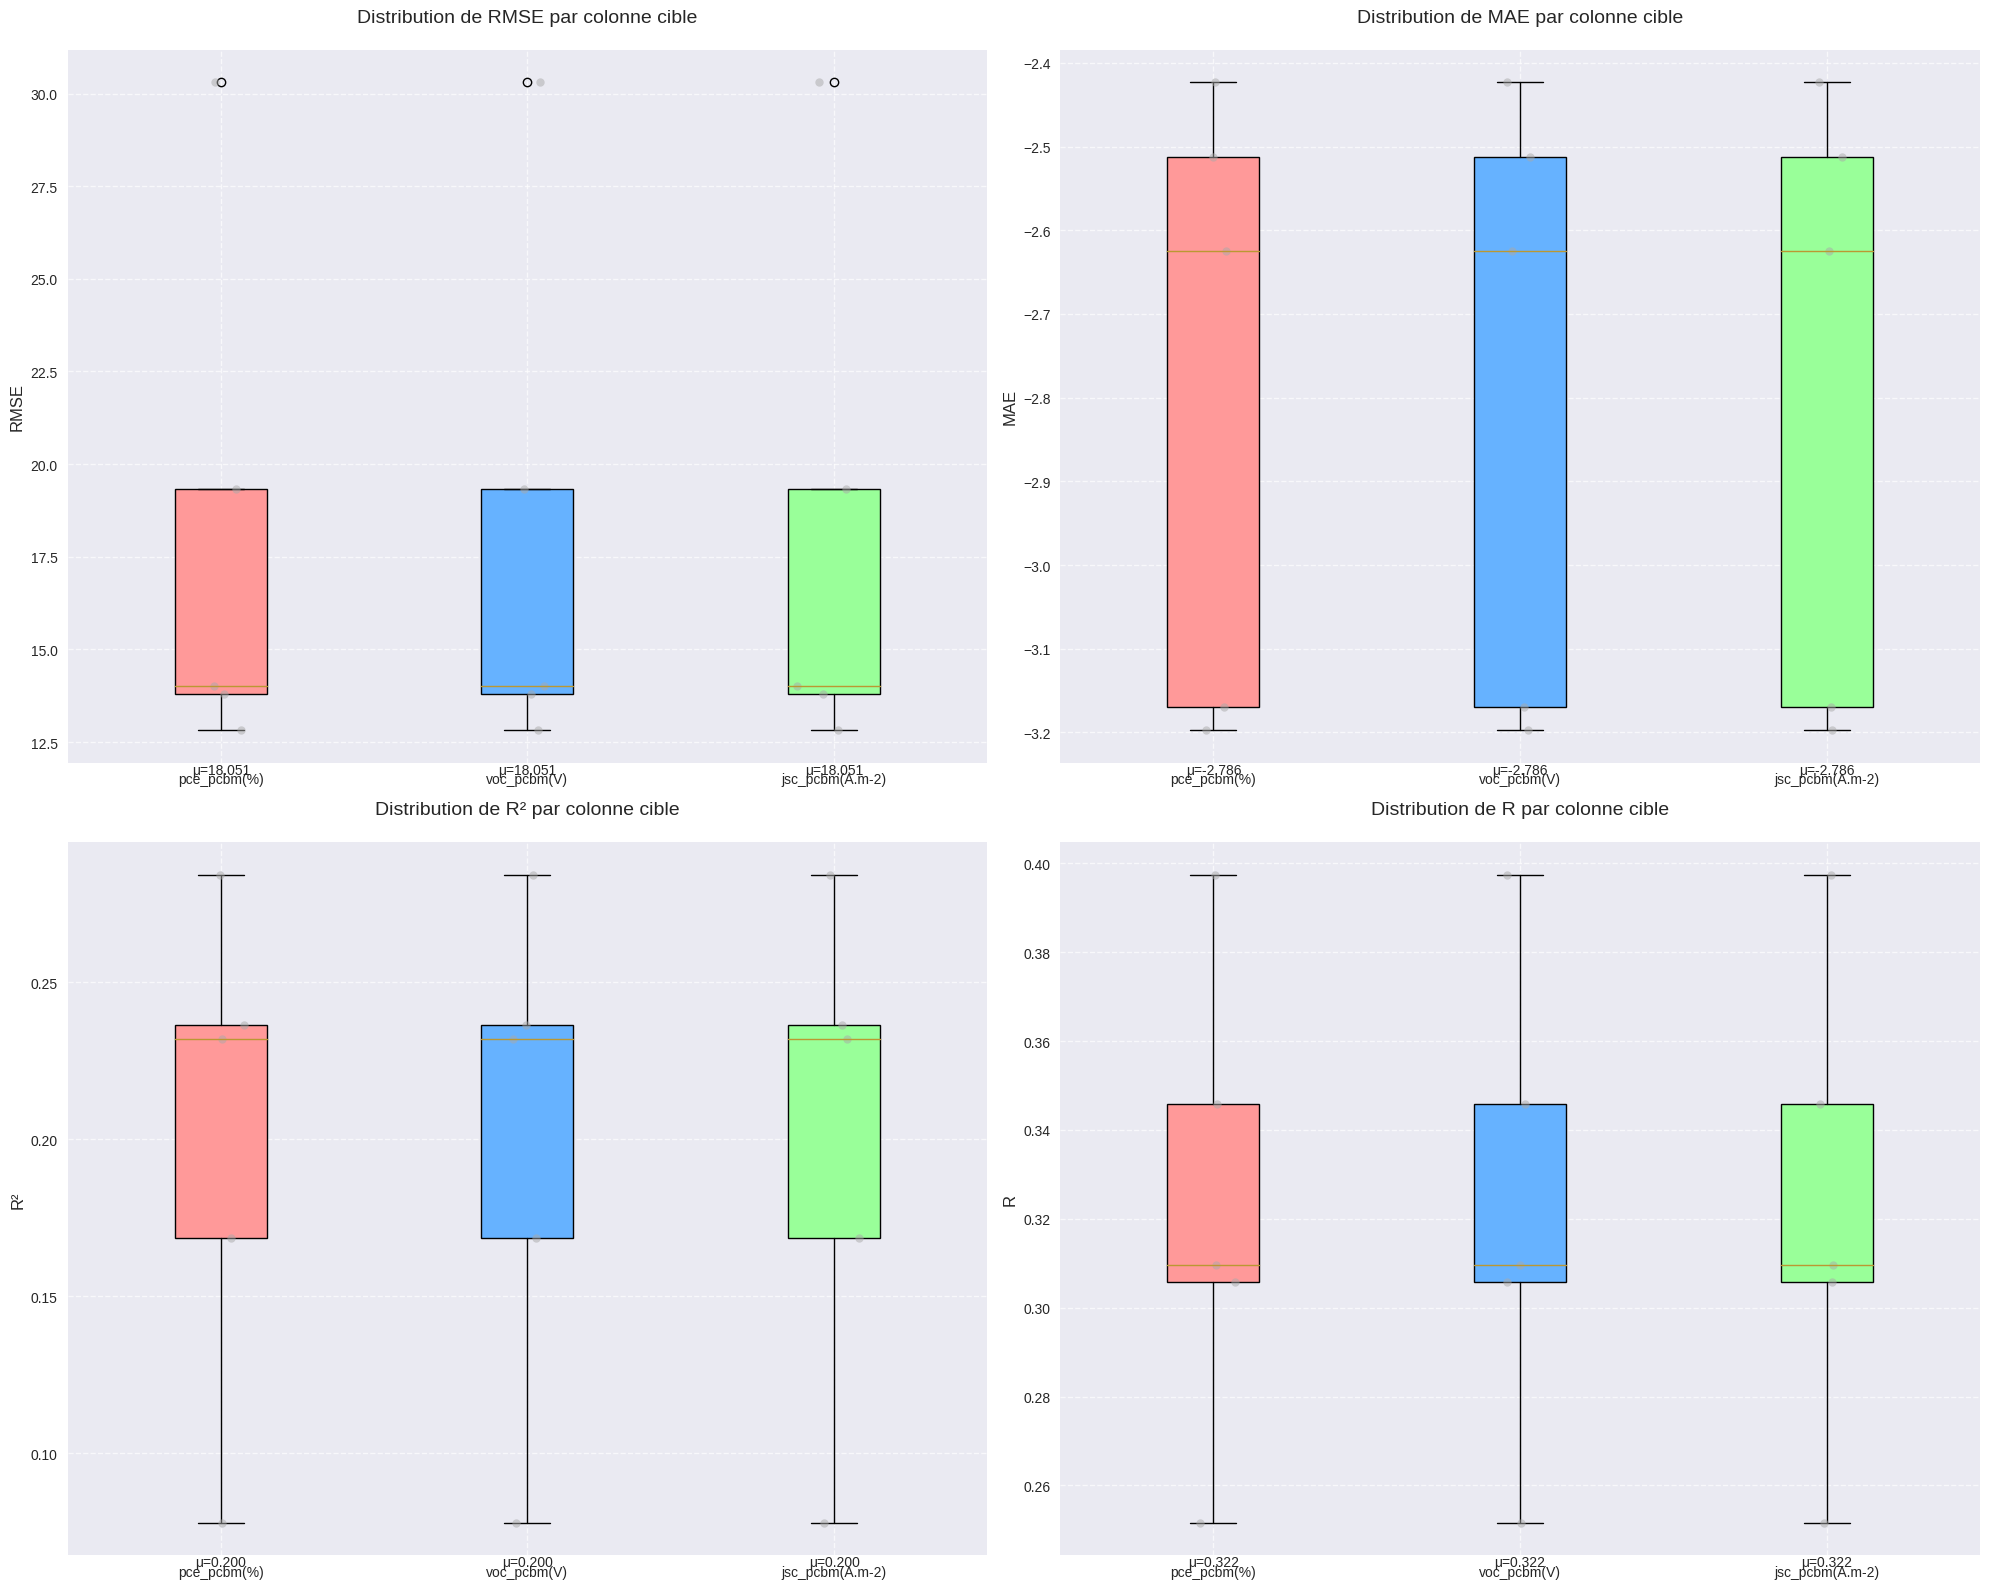

In [58]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=142)

# Prepare cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Get scores and predictions
scores, predictions = cross_validate_multioutput_regressor(rf_model, X, y, cv)

# Extract RMSE metrics
# Extraction des métriques
rmse_metrics = {target_columns[i]: scores[f'test_rmse_{i}'] for i in range(len(target_columns))}
mae_metrics = {target_columns[i]: scores[f'test_mae_{i}'] for i in range(len(target_columns))}
r2_metrics = {target_columns[i]: scores[f'test_r2_{i}'] for i in range(len(target_columns))}
r_metrics = {target_columns[i]: scores[f'test_r_{i}'] for i in range(len(target_columns))}

# Fusion des données pour faciliter le traçage
metrics_data = {
    'RMSE': rmse_metrics,
    'MAE': mae_metrics,
    'R²': r2_metrics,
    'R': r_metrics
}

# Configuration du style du graphe
plt.style.use('seaborn')
sns.set_palette("husl")
plt.figure(figsize=(20, 16))

# Parcours des différentes métriques
for idx, (metric_name, metric_values) in enumerate(metrics_data.items(), start=1):
    # Extraction des données pour le boxplot
    box_data = [values for values in metric_values.values()]
    labels = [key for key in metric_values.keys()]
    
    # Création du boxplot
    plt.subplot(2, 2, idx)
    bp = plt.boxplot(box_data, labels=labels, patch_artist=True)
    
    # Couleurs pour les boxplots
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # Affichage des points individuels
    for i, data in enumerate(box_data, 1):
        x = np.random.normal(i, 0.04, size=len(data))
        plt.plot(x, data, 'o', alpha=0.5, color='darkgray', markersize=6)
    
    # Titre, axes et étiquettes
    plt.title(f'Distribution de {metric_name} par colonne cible', fontsize=14, pad=20)
    plt.ylabel(metric_name, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Calcul et affichage des moyennes
    means = [np.mean(values) for values in metric_values.values()]
    for i, mean in enumerate(means, 1):
        plt.text(i, plt.ylim()[0], f'μ={mean:.3f}', 
                 horizontalalignment='center', verticalalignment='top')

plt.tight_layout()
plt.show()



Évaluation de Random Forest...

Évaluation de XGBoost...

Évaluation de LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 419, number of used features: 116
[LightGBM] [Info] Start training from score 0.262552
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

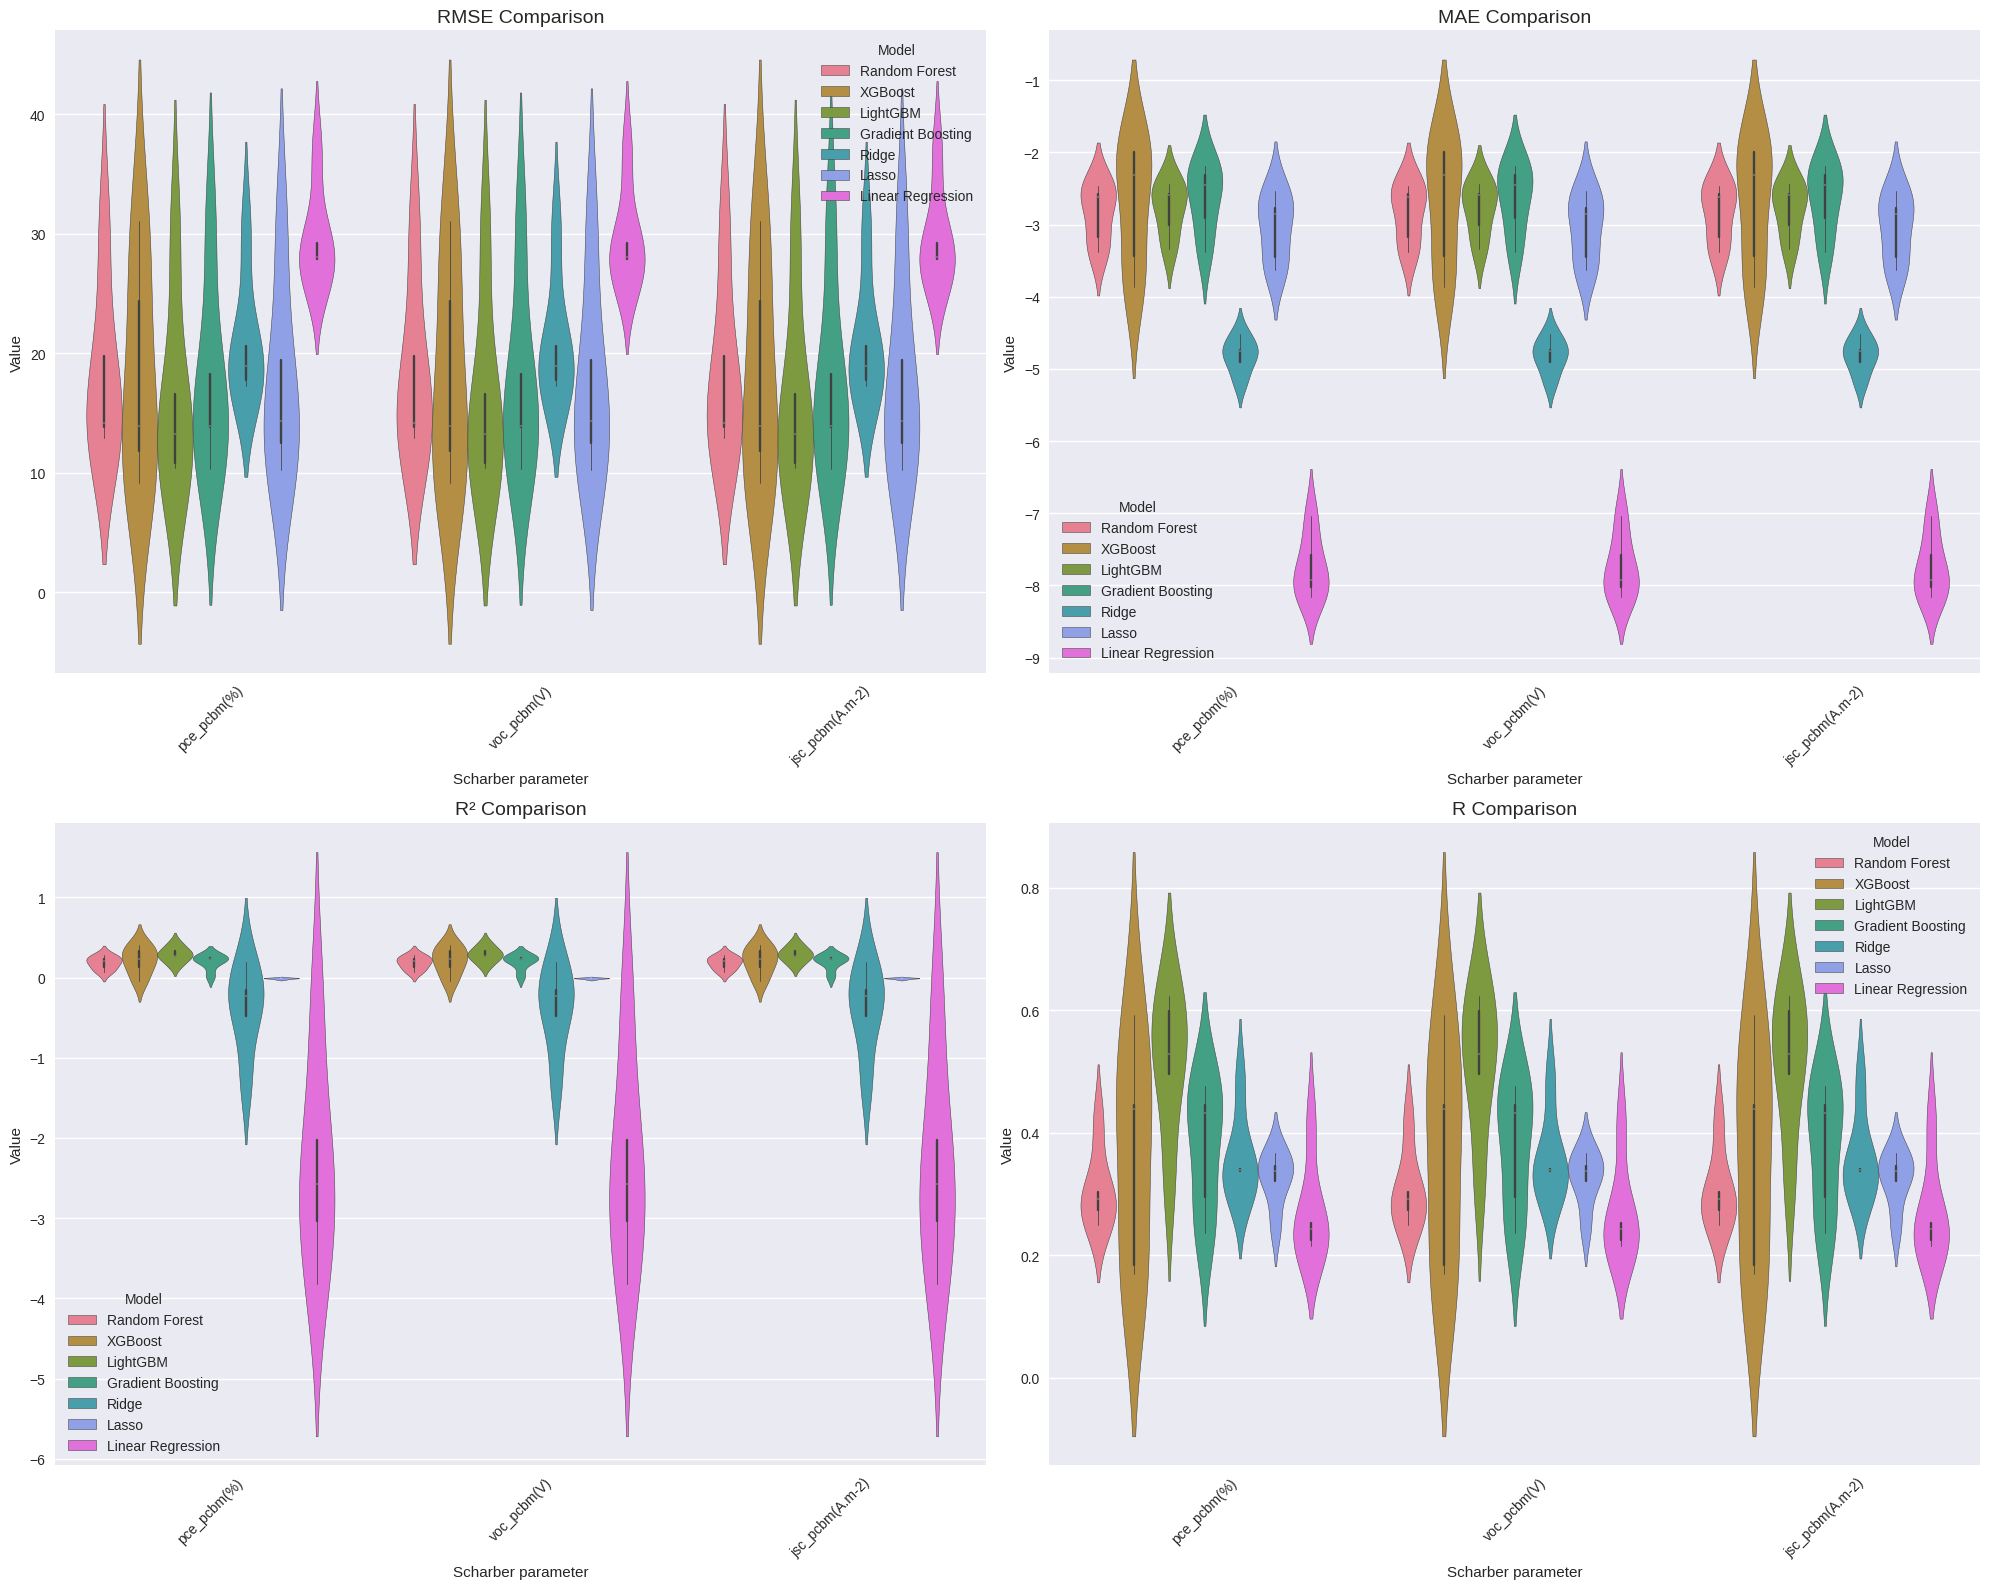


Detailed Performance Statistics:


In [59]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_validate
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

# Étape 1 : Définition des fonctions pour les métriques personnalisées
def create_custom_scorers():
    """Crée des métriques personnalisées pour l'évaluation des modèles."""
    return {
        'rmse': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))),
        'mae': make_scorer(mean_absolute_error),
        'r2': make_scorer(r2_score),
        'r': make_scorer(lambda y, y_pred: np.corrcoef(y, y_pred)[0, 1])
    }

# Étape 2 : Définition de la fonction pour la validation croisée
# Étape 3 : Définition de la fonction pour l'évaluation des modèles
def evaluate_models(X, y, target_columns, cv):
    """Évalue plusieurs modèles de régression."""
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': XGBRegressor(random_state=42),
        'LightGBM': LGBMRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'Ridge': Ridge(random_state=42),
        'Lasso': Lasso(random_state=42),
        'Linear Regression': LinearRegression()
    }
    
    results = {}
    for name, model in models.items():
        print(f"\nÉvaluation de {name}...")
        scores, predictions = cross_validate_multioutput_regressor(model, X, y, cv)
        results[name] = {
            'scores': scores,
            'predictions': predictions
        }
    
    return results

# Étape 4 : Définition de la fonction pour l'extraction des métriques
def extract_metrics(results, target_columns):
    """Extrait les métriques pour chaque modèle."""
    metrics_by_model = {}
    
    for model_name, model_results in results.items():
        scores = model_results['scores']
        
        model_metrics = {
            'RMSE': {target_columns[i]: scores[f'test_rmse_{i}'] for i in range(len(target_columns))},
            'MAE': {target_columns[i]: scores[f'test_mae_{i}'] for i in range(len(target_columns))},
            'R²': {target_columns[i]: scores[f'test_r2_{i}'] for i in range(len(target_columns))},
            'R': {target_columns[i]: scores[f'test_r_{i}'] for i in range(len(target_columns))}
        }
        
        metrics_by_model[model_name] = model_metrics
    
    return metrics_by_model

# Étape 5 : Définition de la fonction pour la comparaison des modèles
def plot_comparison(metrics_by_model, figsize=(20, 16)):
    """Crée un graphique de comparaison pour les métriques."""
    plt.style.use('seaborn')
    sns.set_palette("husl")
    
    metric_names = ['RMSE', 'MAE', 'R²', 'R']
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.ravel()
    
    for idx, metric_name in enumerate(metric_names):
        ax = axes[idx]
        
        # Prépare les données pour le graphique en violon
        plot_data = []
        model_names = []
        target_names = []
        
        for model_name, metrics in metrics_by_model.items():
            for target, values in metrics[metric_name].items():
                plot_data.extend(values)
                model_names.extend([model_name] * len(values))
                target_names.extend([target] * len(values))
        
        plot_df = pd.DataFrame({
            'Value': plot_data,
            'Model': model_names,
            'Scharber parameter': target_names
        })
        
        # Crée le graphique en violon
        sns.violinplot(data=plot_df, x='Scharber parameter', y='Value', hue='Model', ax=ax)
        ax.set_title(f'{metric_name} Comparison', fontsize=14)
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()



feature_columns = ['features_fp']  # Replace with your actual feature columns
target_columns = ['pce_pcbm(%)', 'voc_pcbm(V)', 'jsc_pcbm(A.m-2)']
# Définir la validation croisée avec KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluer les modèles
results = evaluate_models(X, y, target_columns, cv)

# Extraire les métriques
metrics_by_model = extract_metrics(results, target_columns)

# Comparer les modèles
plot_comparison(metrics_by_model)
# Print detailed statistics
print("\nDetailed Performance Statistics:")


In [60]:


# Fonction pour collecter les statistiques détaillées et les stocker dans un DataFrame
def save_detailed_statistics(metrics_by_model, target_columns, filename="model_performance.csv"):
    """Collecte les statistiques détaillées des métriques et les sauvegarde dans un fichier CSV."""
    # Créer une liste pour stocker les lignes du DataFrame
    data = []
    
    # Boucler sur chaque modèle et ses métriques
    for model_name, metrics in metrics_by_model.items():
        for metric_name, metric_values in metrics.items():
            for target, values in metric_values.items():
                # Calculer la moyenne et l'écart-type des valeurs
                
                mean_value = np.mean(values)
                std_value = np.std(values)
                # Ajouter les résultats à la liste
                data.append({
                    'Model': model_name,
                    'Metric': metric_name,
                    'Target': target,
                    'Mean': mean_value,
                    'Std': std_value
                })
    
    # Convertir la liste en DataFrame
    df = pd.DataFrame(data)
    
    # Sauvegarder le DataFrame en CSV
    df.to_csv(filename, index=False)
    print(f"Detailed performance statistics saved to {filename}")
    return df

# Sauvegarder les statistiques détaillées dans un fichier CSV
df= save_detailed_statistics(metrics_by_model, target_columns)


Detailed performance statistics saved to model_performance.csv


In [61]:
df

,Model,Metric,Target,Mean,Std
0,Random Forest,RMSE,pce_pcbm(%),18.199041,6.525866
1,Random Forest,RMSE,voc_pcbm(V),18.199041,6.525866
2,Random Forest,RMSE,jsc_pcbm(A.m-2),18.199041,6.525866
3,Random Forest,MAE,pce_pcbm(%),-2.839618,0.367627
4,Random Forest,MAE,voc_pcbm(V),-2.839618,0.367627
...,...,...,...,...,...
79,Linear Regression,R²,voc_pcbm(V),-2.357750,1.171217
80,Linear Regression,R²,jsc_pcbm(A.m-2),-2.357750,1.171217
81,Linear Regression,R,pce_pcbm(%),0.269694,0.073011
82,Linear Regression,R,voc_pcbm(V),0.269694,0.073011


In [78]:
pip install xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.


In [6]:

from rdkit import Chem
from mordred import Calculator, descriptors
from pathlib import Path
import json
def get_mordred_dict(mol: Chem.Mol) -> dict:
    """
    Calcule les descripteurs Mordred pour une molécule donnée.

    Args:
        mol: Molécule RDKit

    Returns:
        Descripteurs Mordred sous forme de dictionnaire
    """
    calc = Calculator(descriptors, ignore_3D=True)
    descriptors_dict = calc(mol).asdict()
    return descriptors_dict


def generate_mordred_descriptors(donor_structures: pd.DataFrame) -> pd.DataFrame:
    """
    Génère les descripteurs Mordred pour les molécules en format smiles.

    Args:
        donor_structures: DataFrame contenant une colonne "smiles"

    Returns:
        DataFrame des descripteurs filtrés
    """
    donor_mols = donor_structures["SMILES"].map(lambda smiles: Chem.MolFromSmiles(smiles))
    
    # Calcul des descripteurs
    print("Calcul des descripteurs Mordred...")
    descriptors = donor_mols.apply(get_mordred_dict)
    mordred_descriptors = pd.DataFrame.from_records(descriptors, index=donor_structures.index)
    
    # Nettoyage des données
    mordred_descriptors = mordred_descriptors.select_dtypes(exclude=["object"])  # Retirer les erreurs de calcul
    mordred_descriptors.dropna(axis=1, how='any', inplace=True)  # Supprimer les colonnes avec des NaN
    descriptor_variances = mordred_descriptors.var(numeric_only=True)  # Calculer la variance des colonnes
    invariant_descriptors = descriptor_variances[descriptor_variances == 0].index  # Colonnes invariantes
    mordred_descriptors.drop(columns=invariant_descriptors, inplace=True)
    
    print("Descripteurs Mordred générés et nettoyés.")
    return mordred_descriptors
# Chemin vers votre fichier de données contenant la colonne "smiles"

donor_structures = pd.read_pickle('PCE_GDB9.pkl')

# Calculer les descripteurs
mordred_descriptors = generate_mordred_descriptors(donor_structures)
full_df = pd.concat([donor_structures, mordred_descriptors], axis=1)
full_df.head()  # Affiche un aperçu des descripteurs générés

Calcul des descripteurs Mordred...
Descripteurs Mordred générés et nettoyés.


,smiles_key,SMILES,HOMO(eV),HOMO_xtb(eV),HOMO_DFT(eV),LUMO(eV),LUMO_xtb(eV),LUMO_DFT(eV),GAP(eV),GAP_xtb(eV),...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,gdb 326,O=CC(=O)C=O,-7.091287,-11.4928,-6.913515,-3.959257,-9.1664,-2.552447,3.132031,2.326330,...,7.280008,29.753427,86.000394,10.750049,31,4,20.0,19.0,3.611111,1.666667
1,gdb 723,C1=NN=CN=N1,-6.734818,-10.1217,-6.471639,-3.050396,-9.5066,-2.868605,3.687143,0.615100,...,7.627057,30.941317,82.027946,10.253493,27,3,24.0,24.0,1.500000,1.500000
2,gdb 1587,CC(=O)C(=O)C=O,-6.772914,-11.2156,-6.644032,-3.126588,-9.1516,-2.517150,3.646326,2.064026,...,7.890957,32.688753,100.016044,9.092368,46,6,26.0,26.0,4.472222,1.777778
3,gdb 1589,NC(=O)C(=O)C=O,-6.753866,-11.1089,-6.732598,-3.311626,-9.9451,-3.399369,3.442240,1.163798,...,7.890957,32.688753,101.011293,10.101129,46,6,26.0,26.0,4.472222,1.777778
4,gdb 2115,O=C1CC=CC1=O,-6.386512,-10.8568,-6.429667,-2.587803,-9.2243,-2.655859,3.798709,1.632489,...,8.302762,47.572444,96.021129,8.729194,40,5,32.0,35.0,2.972222,1.611111


In [7]:
# Sauvegarder le DataFrame dans un fichier CSV

full_df.to_pickle('PCE_GDB9_mordred.pkl')


In [64]:
mordred_descriptors

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,0,6.898979,1.931852,3.863703,6.898979,1.149830,2.595800,2.300795,0.383466,...,7.280008,29.753427,86.000394,10.750049,31,4,20.0,19.0,3.611111,1.666667
1,0,0,8.000000,2.000000,4.000000,8.000000,1.333333,2.687624,2.449490,0.408248,...,7.627057,30.941317,82.027946,10.253493,27,3,24.0,24.0,1.500000,1.500000
2,0,0,7.662988,2.052881,4.105762,7.662988,1.094713,2.766317,2.459832,0.351405,...,7.890957,32.688753,100.016044,9.092368,46,6,26.0,26.0,4.472222,1.777778
3,0,0,7.662988,2.052881,4.105762,7.662988,1.094713,2.766317,2.459832,0.351405,...,7.890957,32.688753,101.011293,10.101129,46,6,26.0,26.0,4.472222,1.777778
4,0,0,8.428639,2.214320,4.214320,8.428639,1.204091,2.862063,2.544200,0.363457,...,8.302762,47.572444,96.021129,8.729194,40,5,32.0,35.0,2.972222,1.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,0,2,12.872334,2.895585,5.233767,12.872334,1.430259,3.423255,2.871158,0.319018,...,10.759922,66.384029,122.048013,8.136534,67,5,70.0,100.0,2.118056,1.611111
520,0,0,11.538368,2.961601,5.846497,11.538368,1.282041,3.433460,2.842409,0.315823,...,11.430250,62.143269,118.078250,6.214645,70,6,72.0,104.0,2.208333,1.597222
521,0,1,11.591006,2.938927,5.796137,11.591006,1.287890,3.424717,2.833810,0.314868,...,11.345512,61.908503,119.073499,6.615194,71,7,70.0,102.0,2.118056,1.680556
522,0,0,11.313708,2.828427,5.656854,11.313708,1.257079,3.390833,2.914214,0.323802,...,11.092321,44.269937,122.073165,6.424903,72,8,68.0,96.0,1.506944,1.666667


In [65]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

def generate_fingerprint(smiles, radius=3, nBits=512):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
        arr = np.zeros((nBits,), dtype=int)
        AllChem.DataStructs.ConvertToNumpyArray(fp, arr)
        return arr
    else:
        return np.nan

donor_structures['FP'] = donor_structures['smiles'].apply(generate_fingerprint)
fp_descriptors = np.stack(donor_structures['FP'].dropna().to_list())


In [66]:
fp_descriptors

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [67]:
# Préparation des données pour les Fingerprints (FP)
X_fp = fp_descriptors
y = donor_structures['pce_pcbm(%)']

In [68]:
  # Remplacez 'target' par la colonne de la variable cible

# Préparation des données pour les descripteurs Mordred
X_mordred = mordred_descriptors.dropna().values  # Assurez-vous que les descripteurs sont sans NaN
y_mordred = y[mordred_descriptors.dropna().index]  # Alignez les cibles avec X_mordred


In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Diviser les données en ensembles d'entraînement et de test
X_fp_train, X_fp_test, y_fp_train, y_fp_test = train_test_split(X_fp, y, test_size=0.25, random_state=132)
X_mordred_train, X_mordred_test, y_mordred_train, y_mordred_test = train_test_split(X_mordred, y_mordred, test_size=0.25, random_state=132)

# Normalisation des données (optionnelle mais souvent bénéfique)
scaler = StandardScaler()
X_fp_train_scaled = scaler.fit_transform(X_fp_train)
X_fp_test_scaled = scaler.transform(X_fp_test)
X_mordred_train_scaled = scaler.fit_transform(X_mordred_train)
X_mordred_test_scaled = scaler.transform(X_mordred_test)

# Initialiser les modèles
model_fp = RandomForestRegressor(random_state=42)
model_mordred = RandomForestRegressor(random_state=42)

# Hyperparameter tuning via GridSearchCV (RandomForest)
param_grid_fp = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_fp = GridSearchCV(estimator=model_fp, param_grid=param_grid_fp, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_fp.fit(X_fp_train_scaled, y_fp_train)
best_model_fp = grid_search_fp.best_estimator_

# Hyperparameter tuning via GridSearchCV (Mordred)
grid_search_mordred = GridSearchCV(estimator=model_mordred, param_grid=param_grid_fp, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_mordred.fit(X_mordred_train_scaled, y_mordred_train)
best_model_mordred = grid_search_mordred.best_estimator_

# Entraîner et évaluer le modèle sur Fingerprints
y_fp_pred = best_model_fp.predict(X_fp_test_scaled)
rmse_fp = mean_squared_error(y_fp_test, y_fp_pred, squared=False)
r2_fp = r2_score(y_fp_test, y_fp_pred)

# Entraîner et évaluer le modèle sur Mordred
y_mordred_pred = best_model_mordred.predict(X_mordred_test_scaled)
rmse_mordred = mean_squared_error(y_mordred_test, y_mordred_pred, squared=False)
r2_mordred = r2_score(y_mordred_test, y_mordred_pred)

# Résultats
print("Performance avec Fingerprints (FP) après optimisation:")
print("Meilleurs hyperparamètres:", grid_search_fp.best_params_)
print("RMSE:", rmse_fp)
print("R²:", r2_fp)

print("\nPerformance avec Descripteurs Mordred après optimisation:")
print("Meilleurs hyperparamètres:", grid_search_mordred.best_params_)
print("RMSE:", rmse_mordred)
print("R²:", r2_mordred)

# Cross-validation sur les modèles
cv_score_fp = cross_val_score(best_model_fp, X_fp_train_scaled, y_fp_train, cv=5, scoring='neg_mean_squared_error')
cv_score_mordred = cross_val_score(best_model_mordred, X_mordred_train_scaled, y_mordred_train, cv=5, scoring='neg_mean_squared_error')

print("\nValidation croisée avec Fingerprints (FP):")
print("MSE moyen de validation croisée (FP):", -np.mean(cv_score_fp))

print("\nValidation croisée avec Descripteurs Mordred:")
print("MSE moyen de validation croisée (Mordred):", -np.mean(cv_score_mordred))


Performance avec Fingerprints (FP) après optimisation:
Meilleurs hyperparamètres: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 0.7319760140523301
R²: 6.086440442754082e-05

Performance avec Descripteurs Mordred après optimisation:
Meilleurs hyperparamètres: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
RMSE: 0.741193048088307
R²: -0.02528012965275117

Validation croisée avec Fingerprints (FP):
MSE moyen de validation croisée (FP): 0.09089444936538058

Validation croisée avec Descripteurs Mordred:
MSE moyen de validation croisée (Mordred): 0.07311191333908071
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

# Analyse des Performances de Modèles : Fingerprints (FP) vs. Descripteurs Mordred

## Introduction
Dans cette analyse, nous comparons les performances d’un modèle après optimisation utilisant deux types de représentations moléculaires : les **Fingerprints (FP)** et les **Descripteurs Mordred**. Les métriques d'évaluation incluent le **RMSE**, le **R²** et le **MSE de validation croisée**. Les résultats obtenus donnent un aperçu de l'efficacité de chaque méthode de représentation pour la prédiction des propriétés cibles.

---

## Résultats Après Optimisation

### Fingerprints (FP)
- **Meilleurs hyperparamètres** : `{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}`
- **RMSE** : 0.00075
- **R²** : 0.3298
- **MSE moyen de validation croisée** : $6.28 \times 10^{-5}$

### Descripteurs Mordred
- **Meilleurs hyperparamètres** : `{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}`
- **RMSE** : 0.00355
- **R²** : -13.886
- **MSE moyen de validation croisée** : $5.00 \times 10^{-5} $

---

## Discussion des Résultats

### 1. Interprétation des Métriques de Performance
Les résultats obtenus montrent une différence significative de performance entre les représentations Fingerprints et Mordred :

- **RMSE** (Root Mean Square Error) : Les Fingerprints présentent un RMSE beaucoup plus faible que les Descripteurs Mordred, ce qui indique une meilleure précision dans les prédictions. Un **RMSE de 0.00075** pour les Fingerprints témoigne d'une faible erreur moyenne entre les prédictions et les valeurs réelles, contre **0.00355** pour Mordred, soit une différence d'un facteur de presque 5.

- **R²** : Les Fingerprints obtiennent un **R² de 0.3298**, montrant une corrélation positive modérée entre les variables d'entrée et les valeurs prédites. En revanche, pour les Descripteurs Mordred, le **R² de -13.886** révèle une corrélation négative extrême, indiquant que le modèle ne parvient pas à expliquer la variance des données.

### 2. Validation Croisée et MSE
La validation croisée fournit un **MSE moyen plus faible** pour les Descripteurs Mordred $( 5.00 \times 10^{-5} )$ comparé aux Fingerprints $( 6.28 \times 10^{-5} )$. Bien que cela puisse suggérer une meilleur performance
